<h1><center>Instituto Tecnológico y de Estudios Superiores de Occidente</center></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200">

## **Masters in Data Science**

### Convex Optimization

<h3>HW11: Pyomo</h3></center>

**Professor:**

> Dr. Juan Diego Sánchez Torres

**Team:**


- Luis Alfonso Guerrero Montaño
- Juan Pablo Acevedo Robles
- Roberto Carlos Vázquez Flores
- Alex Medina Anguiano
- Angel Wong Dan




In [1]:
conda install -c conda-forge glpk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Problem 1: Warm Up
Use the Pyomo package 2 and slides to reproduce all the seven examples of the Pyomo Gallery. Note that some details are missing, and the code may need an update. So, it is necessary an adequate mathematical formulation, a brief background of the problem (and its bibliographical references), a much better explanation, more graphics, and an updated and working code (consider the good practices of coding, as the presence of comments, spacing, and tabulation).

Upload your results to *Github* in the form of a *Jupyter* notebook, then make it interactive using *Binder*, hence submit your results through both links. The use of *Google Colab* is highly recommended.

### 1.1 The Diet Problem

The goal of the Diet Problem is to select foods that satisfy daily nutritional requirements at minimum cost. This problem can be formulated as a linear program, for which constraints limit the number of calories and the amount of vitamins, minerals, fats, sodium, and cholesterol in the diet. Danzig (1990) notes that the diet problem was motivated by the US Army's desire to minimize the cost of feeding GIs in the field while still providing a healthy diet.

* **Sets**
  * F = set of foods
  * N = set of nutrients
* **Parameters**
  * ci = cost per serving of food i, ∀i∈F
  * aij = amount of nutrient j in food i, ∀i∈F,∀j∈N
  * Nminj = minimum level of nutrient j, ∀j∈N
  * Nmaxj = maximum level of nutrient j, ∀j∈N
  * Vi = the volume per serving of food i, ∀i∈F
  * Vmax = maximum volume of food consumed
* **Variables**
  * xi = number of servings of food i to consume
* **Objective**
  * Minimize the total cost of the food
  * min∑i∈Fcixi
* **Constraints**
  * Limit nutrient consumption for each nutrient j∈N.
    * Nminj≤∑i∈Faijxi≤Nmaxj, ∀j∈N
  * Limit the volume of food consumed
    * ∑i∈FVixi≤Vmax
  * Consumption lower bound
    * xi≥0, ∀i∈F




In [2]:
from pyomo.environ import *
infinity = float('inf')
model = AbstractModel()

In [3]:
# Foods
model.F = Set()
# Nutrients
model.N = Set()

In [4]:
# Cost of each food
model.c    = Param(model.F, within=PositiveReals)
# Amount of nutrient in each food
model.a    = Param(model.F, model.N, within=NonNegativeReals)
# Lower and upper bound on each nutrient
model.Nmin = Param(model.N, within=NonNegativeReals, default=0.0)
model.Nmax = Param(model.N, within=NonNegativeReals, default=infinity)
# Volume per serving of food
model.V    = Param(model.F, within=PositiveReals)
# Maximum volume of food consumed
model.Vmax = Param(within=PositiveReals)

In [5]:
# Number of servings consumed of each food
model.x = Var(model.F, within=NonNegativeIntegers)

In [6]:
# Minimize the cost of food that is consumed
def cost_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.F)
model.cost = Objective(rule=cost_rule)

In [7]:
# Limit nutrient consumption for each nutrient
def nutrient_rule(model, j):
    value = sum(model.a[i,j]*model.x[i] for i in model.F)
    return inequality(model.Nmin[j], value, model.Nmax[j])
model.nutrient_limit = Constraint(model.N, rule=nutrient_rule)

# Limit the volume of food consumed
def volume_rule(model):
    return sum(model.V[i]*model.x[i] for i in model.F) <= model.Vmax
model.volume = Constraint(rule=volume_rule)

In [8]:
!cat diet.dat

param:  F:                          c     V  :=
  "Cheeseburger"                 1.84   4.0  
  "Ham Sandwich"                 2.19   7.5  
  "Hamburger"                    1.84   3.5  
  "Fish Sandwich"                1.44   5.0  
  "Chicken Sandwich"             2.29   7.3  
  "Fries"                         .77   2.6  
  "Sausage Biscuit"              1.29   4.1  
  "Lowfat Milk"                   .60   8.0 
  "Orange Juice"                  .72  12.0 ;

param Vmax := 75.0;

param:  N:       Nmin   Nmax :=
        Cal      2000      .
        Carbo     350    375
        Protein    55      .
        VitA      100      .
        VitC      100      .
        Calc      100      .
        Iron      100      . ;

param a:
                               Cal  Carbo Protein   VitA   VitC  Calc  Iron :=
  "Cheeseburger"               510     34     28     15      6    30    20
  "Ham Sandwich"               370     35     24     15     10    20    20
  "Hamburger"                  500     42

In [9]:
!pyomo solve --solver=glpk diet.py diet.dat

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.00] Creating model
[    0.02] Applying solver
[    0.04] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: optimal
      Function Value: 15.05
    Solver results file: results.json
[    0.04] Applying Pyomo postprocessing actions
[    0.04] Pyomo Finished


In [10]:
!cat results_diet.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 15.05
  Upper bound: 15.05
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 10
  Number of nonzeros: 77
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 23
      Number of created subproblems: 23
  Error rc: 0
  Time: 0.012578248977661133
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

### 1.2 Max Flow

The goal of the maximum flow problem is to find the maximum flow possible in a network from some given source node to a given sink node. Applications of the max flow problem include finding the maximum flow of orders through a job shop, the maximum flow of water through a storm sewer system, and the maximum flow of product through a product distribution system, among others. Schrijver (2002) note that the maximum flow problem was first formulated in 1954 by T. E. Harris and F. S. Ross as a simplified model of Soviet railway traffic flow.

A network is a directed graph, and the arc capacities, or upper bounds, are the only relevant parameters. A network graph does not have to be symmetric: if an arc (v,w) is in the graph, the reverse arc (w,v) does not have to be in the graph. Further, parallel arcs are not allowed, and self-loops are not allowed. The source and the sink are distinct nodes in the network, but the sink may be unreachable from the source.

In [11]:
### Max Flow
from pyomo.environ import *

model = AbstractModel()

In [12]:
# Nodes in the network
model.N = Set()
# Network arcs
model.A = Set(within=model.N*model.N)

In [13]:
# Source node
model.s = Param(within=model.N)
# Sink node
model.t = Param(within=model.N)
# Flow capacity limits
model.c = Param(model.A)

In [14]:
# The flow over each arc
model.f = Var(model.A, within=NonNegativeReals)

In [15]:
# Maximize the flow into the sink nodes
def total_rule(model):
    return sum(model.f[i,j] for (i, j) in model.A if j == value(model.t))
model.total = Objective(rule=total_rule, sense=maximize)

In [16]:
# Enforce an upper limit on the flow across each arc
def limit_rule(model, i, j):
    return model.f[i,j] <= model.c[i, j]
model.limit = Constraint(model.A, rule=limit_rule)

# Enforce flow through each node
def flow_rule(model, k):
    if k == value(model.s) or k == value(model.t):
        return Constraint.Skip
    inFlow  = sum(model.f[i,j] for (i,j) in model.A if j == k)
    outFlow = sum(model.f[i,j] for (i,j) in model.A if i == k)
    return inFlow == outFlow
model.flow = Constraint(model.N, rule=flow_rule)

In [17]:
!pyomo solve --solver=glpk maxflow.py maxflow.dat

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.00] Creating model
[    0.02] Applying solver
[    0.04] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: feasible
      Function Value: 14.0
    Solver results file: results.json
[    0.04] Applying Pyomo postprocessing actions
[    0.04] Pyomo Finished


In [18]:
!cat results_maxflow.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 14.0
  Upper bound: 14.0
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 12
  Number of nonzeros: 30
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.007269620895385742
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

### 1.3 *p*-Median Problem

In [19]:
!pyomo solve --solver=glpk p-median.py p-median.dat

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.00] Creating model
[    0.02] Applying solver
[    0.04] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: optimal
      Function Value: 6.431184939357673
    Solver results file: results.json
[    0.04] Applying Pyomo postprocessing actions
[    0.04] Pyomo Finished


In [20]:
!cat results-p_median.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 6.43118493935767
  Upper bound: 6.43118493935767
  Number of objectives: 1
  Number of constraints: 68
  Number of variables: 71
  Number of nonzeros: 191
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.009302616119384766
# ----------------------------------------------------------
#   Solution Information
# ----------

### 1.4 Transport Problem

In [21]:
!pyomo solve --solver=glpk transport.py

[    0.00] Setting up Pyomo environment
[    0.00] Applying Pyomo preprocessing actions
[    0.01] Creating model
[    0.01] Applying solver
[    0.09] Processing results
    Number of solutions: 1
    Solution Information
      Gap: 0.0
      Status: feasible
      Function Value: 153.675
    Solver results file: results.json
[    0.11] Applying Pyomo postprocessing actions
x : Shipment quantities in case
    Size=6, Index=x_index
    Key                       : Lower : Value : Upper : Fixed : Stale : Domain
     ('san-diego', 'chicago') :   0.0 :   0.0 :  None : False : False :  Reals
    ('san-diego', 'new-york') :   0.0 : 325.0 :  None : False : False :  Reals
      ('san-diego', 'topeka') :   0.0 : 275.0 :  None : False : False :  Reals
       ('seattle', 'chicago') :   0.0 : 300.0 :  None : False : False :  Reals
      ('seattle', 'new-york') :   0.0 :   0.0 :  None : False : False :  Reals
        ('seattle', 'topeka') :   0.0 :   0.0 :  None : False : False :  Reals
[    0.11] 

In [22]:
!cat results_transport.yml

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 153.675
  Upper bound: 153.675
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 7
  Number of nonzeros: 13
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.007764577865600586
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

### 1.5 Min-cost-flow

The example in pandas_min_cost_flow example is a model for solving min-cost-flow problems.

The example does not use Pyomo params, but instead reads in all the model data from CSV files using pandas dataframes. This can be useful for creating models within more complex programs, that pre and post-process a model's input and output data. The code includes comments and the ipython notebook includes an example run using the provided sample input data files.

In [23]:
!cat min_cost_flow.py

import pyomo
import pandas
import pyomo.opt
import pyomo.environ as pe
import gurobipy as gp

class MinCostFlow:
    """This class implements a standard min-cost-flow model.  
    
    It takes as input two csv files, providing data for the nodes and the arcs of the network.  The nodes file should have columns:
    
    Node, Imbalance

    that specify the node name and the flow imbalance at the node.  The arcs file should have columns:

    Start, End, Cost, UpperBound, LowerBound

    that specify an arc start node, an arc end node, a cost for the arc, and upper and lower bounds for the flow."""
    def __init__(self, nodesfile, arcsfile):
        """Read in the csv data."""
        # Read in the nodes file
        self.node_data = pandas.read_csv('nodes.csv')
        self.node_data.set_index(['Node'], inplace=True)
        self.node_data.sort_index(inplace=True)
        # Read in the arcs file
        self.arc_data = pandas.read_csv('arcs.csv')
        self.arc_data.set_index(['Sta

In [24]:
!python min_cost_flow.py

Restricted license - for non-production use only - expires 2023-10-25
Set parameter LogFile to value "/tmp/tmpmldeuzcu.log"
No parameters matching 'mip_tolerances_integrality' found
No parameters matching 'mip_tolerances_mipgap' found
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 6 rows, 7 columns and 15 nonzeros
Model fingerprint: 0xf19039b9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  5.000000000e+00
Set parameter LogFile to value ""


---------------------------
Co

### 1.6 Network Interdiction

The network_interdiction examples directory contains several examples of network interdiction models. From least complicated to most complicated, they are:

1. Shortest path interdiction
2. Max flow interdiction
3. Min cost flow interdiction
4. Multi commodity flow interdiction

Each of the examples is structured in a similar way. There is a main class that contains the Pyomo model. That class takes as input several CSV files, describing the network structure and its associated data, as well as the number of attacks for the interdiction model. Calling the solve `solve()` and `printSolution()` methods solves the model, and prints the solution in a human legible format.

Each directory includes example input files and an .ipynb file that contains an example run of the network interdiction model.

#### Shortest path interdiction

In [25]:
!cat sp_interdict.py

import pandas
import pyomo
import pyomo.opt
import pyomo.environ as pe
import logging

class SPInterdiction:
    """A class to compute shortest path interdictions."""

    def __init__(self, nodefile, arcfile, attacks=0):
        """
        All the files are CSVs with columns described below.  Attacks is the number of attacks.

        - nodefile:
            Node, SupplyDemand

        Every node must appear as a line in the nodefile.  SupplyDemand describes the flow imbalance at the node.

        - arcfile:
            StartNode,EndNode,Cost,Attackable

        Every arc must appear in the arcfile.  The data also describes the arc's cost and whether we can attack this arc.
        """
        # Read in the node_data
        self.node_data = pandas.read_csv(nodefile)
        self.node_data.set_index(['Node'], inplace=True)
        self.node_data.sort_index(inplace=True)
        # Read in the arc_data
        self.arc_data = pandas.read_csv(arcfile)
        self.arc_data['xbar'] = 0


In [26]:
!python sp_interdict.py

Restricted license - for non-production use only - expires 2023-10-25

Using 0 attacks:



Flow on arc B -> End: 1.00
Flow on arc C -> B: 1.00
Flow on arc Start -> C: 1.00

----------
Total cost = 5.00 (primal) 5.00 (dual)

Using 1 attacks:

Interdict arc B -> End


Flow on arc C -> D: 1.00
Flow on arc D -> End: 1.00
Flow on arc Start -> C: 1.00

----------
Total cost = 17.00 (primal) 17.00 (dual)

Using 2 attacks:

Interdict arc B -> End
Interdict arc Start -> C

Remaining supply on node Start: 1.00
Remaining demand on node End: 1.00


----------
Total cost = 100.00 (primal) 100.00 (dual)


#### Max flow interdiction

In [27]:
!cat max_flow_interdict.py

import pandas
import pyomo
import pyomo.opt
import pyomo.environ as pe
import logging

class MaxFlowInterdiction:
    """A class to compute max-flow interdictions."""

    def __init__(self, nodefile, arcfile, attacks=0):
        """
        All the files are CSVs with columns described below.  Attacks is the number of attacks.

        - nodefile:
            Node

        Every node must appear as a line in the nodefile. There are two special nodes called 'Start' and 'End' that define the source and sink of the max-flow problem. 

        - arcfile:
            StartNode,EndNode,Capacity,Attackable

        Every arc must appear in the arcfile.  The data also describes the arc's capacity and whether we can attack this arc.
        """
        # Read in the node_data
        self.node_data = pandas.read_csv(nodefile)
        self.node_data.set_index(['Node'], inplace=True)
        self.node_data.sort_index(inplace=True)
        # Read in the arc_data
        self.arc_data = pandas.rea

In [28]:
!python max_flow_interdict.py

Restricted license - for non-production use only - expires 2023-10-25

Using 0 attacks:


Flow on arc B -> End: 40.00
Flow on arc C -> B: 30.00
Flow on arc C -> D: 40.00
Flow on arc D -> End: 40.00
Flow on arc Start -> B: 10.00
Flow on arc Start -> C: 70.00

----------
Total flow = 80.00 (primal) 80.00 (dual)

Using 1 attacks:

Interdict arc Start -> C

Flow on arc B -> End: 10.00
Flow on arc Start -> B: 10.00

----------
Total flow = 10.00 (primal) 10.00 (dual)

Using 2 attacks:

Interdict arc B -> End
Interdict arc Start -> C


----------
Total flow = 0.00 (primal) 0.00 (dual)


#### Min cost flow interdiction

In [29]:
!cat min_cost_flow_interdict.py

import networkx
import pandas
import pyomo
import pyomo.opt
import pyomo.environ as pe
import scipy
import itertools
import logging

class MinCostFlowInterdiction:
    """A class to compute min-cost-flow interdictions."""

    def __init__(self, nodefile, arcfile, attacks=0):
        """
        All the files are CSVs with columns described below.  Attacks is the number of attacks.

        - nodefile:
            Node, SupplyDemand

        Every node must appear as a line in the nodefile.  SupplyDemand describes the flow imbalance at the node.

        - arcfile:
            StartNode,EndNode,Capacity,Cost,Attackable

        Every arc must appear in the arcfile.  The data also describes the arc's capacity, cost, and whether we can attack this arc.
        """
        # Read in the node_data
        self.node_data = pandas.read_csv(nodefile)
        self.node_data.set_index(['Node'], inplace=True)
        self.node_data.sort_index(inplace=True)
        # Read in the arc_data
        

In [30]:
!python min_cost_flow_interdict.py

Using 0 attacks:
Flow on arc B -> End: 30.00
Flow on arc C -> B: 20.00
Flow on arc Start -> B: 10.00
Flow on arc Start -> C: 10.00
----------
Total cost = 700.00 (primal) 700.00 (dual)
Using 1 attacks:
Interdict arc Start -> C
Remaining supply on node Start: 10.00
Remaining demand on node End: 10.00
Flow on arc B -> End: 20.00
Flow on arc C -> B: 10.00
Flow on arc Start -> B: 10.00
----------
Total cost = 7300.00 (primal) 7300.00 (dual)
Using 2 attacks:
Interdict arc B -> End
Interdict arc D -> End
Remaining supply on node C: 10.00
Remaining supply on node Start: 20.00
Remaining demand on node End: 30.00
----------
Total cost = 21000.00 (primal) 21000.00 (dual)


#### Multi commodity flow interdiction

In [31]:
!cat multi_commodity_flow_interdict.py

import pandas
import pyomo
import pyomo.opt
import pyomo.environ as pe
import logging

class MultiCommodityInterdiction:
    """A class to compute multicommodity flow interdictions."""

    def __init__(self, nodefile, node_commodity_file, arcfile, arc_commodity_file, attacks=0):
        """
        All the files are CSVs with columns described below.  Attacks is the number of attacks.

        - nodefile:
            Node

        Every node must appear as a line in the nodefile.  You can have additional columns as well.

        - node_commodity_file:
            Node,Commodity,SupplyDemand

        Every commodity node imbalance that is not zero must appear in the node_commodity_file

        - arcfile:
            StartNode,EndNode,Capacity,Attackable

        Every arc must appear in the arcfile.  Also the arcs total capacity and whether we can attack this arc.

        - arc_commodity_file:
            StartNode,EndNode,Commodity,Cost,Capacity

        This file specifies the cos

In [32]:
!python multi_commodity_flow_interdict.py


Using 0 attacks:



Flow on arc B -> End: 10.00 Corn
Flow on arc C -> B: 10.00 Corn
Flow on arc C -> D: 20.00 Rice
Flow on arc Start -> C: 20.00 Rice

----------
Total cost = 3600.00 (primal) 3600.00 (dual)

Using 1 attacks:

Interdict arc C -> B


Flow on arc C -> D: 10.00 Corn
Flow on arc C -> D: 20.00 Rice
Flow on arc D -> End: 10.00 Corn
Flow on arc Start -> C: 20.00 Rice

----------
Total cost = 9600.00 (primal) 9600.00 (dual)

Using 2 attacks:

Interdict arc B -> D
Interdict arc C -> D

Remaining supply of Rice on node Start: 20.00
Remaining demand of Rice on node D: 20.00

Flow on arc B -> End: 10.00 Corn
Flow on arc C -> B: 10.00 Corn

----------
Total cost = 143000.00 (primal) 143000.00 (dual)


### 1.7 Row Generation and MST

The example in row_generation_mst applies row generation to solve the Minimum Spanning Tree (MST) problem. The example generates subtour elimination constraints until an MST is found.

The directory also provides an sample input file and example runs following the MST example on Wikipedia.

In [33]:
!cat mst.py

import pyomo
import pyomo.opt
import pyomo.environ as pe
import pandas
import networkx

class MSTRowGeneration:
    """A class to find Minimum Spanning Tree using a row-generation algorithm."""

    def __init__(self, nfile):
        """The input is a CSV file describing the undirected network's edges."""
        self.df = pandas.read_csv(nfile)

        self.createRelaxedModel()

    def createRelaxedModel(self):
        """Create the relaxed model, without any subtour elimination constraints."""
        df = self.df
        node_set = set( list( df.startNode ) + list(df.destNode) )

        # Create the model and sets
        m = pe.ConcreteModel()

        df.set_index(['startNode','destNode'], inplace=True)
        edge_set = df.index.unique()

        m.edge_set = pe.Set(initialize=edge_set, dimen=2)
        m.node_set = pe.Set(initialize=node_set)
    
        # Define variables
        m.Y = pe.Var(m.edge_set, domain=pe.Binary)

        # Objective
        def obj_rule(m):
     

In [34]:
!python mst.py

    source (type: set).  This WILL potentially lead to nondeterministic
    behavior in Pyomo
Restricted license - for non-production use only - expires 2023-10-25
Adding constraint for connected component:
['A', 'B', 'E', 'D']
Y[A,B] + Y[A,E] + Y[A,D] + Y[B,E] + Y[B,D] + Y[D,E]  <=  3.0
--------------

Adding constraint for connected component:
['A', 'B', 'E', 'C', 'F']
Y[A,B] + Y[A,E] + Y[B,E] + Y[E,C] + Y[E,F] + Y[C,F]  <=  4.0
--------------

Adding constraint for connected component:
['A', 'B', 'E', 'D', 'C', 'F']
Y[A,B] + Y[A,E] + Y[A,D] + Y[B,E] + Y[B,D] + Y[D,E] + Y[E,C] + Y[E,F] + Y[C,F]  <=  5.0
--------------

Y : Size=9, Index=edge_set
    Key        : Lower : Value : Upper : Fixed : Stale : Domain
    ('A', 'B') :     0 :   1.0 :     1 : False : False : Binary
    ('A', 'D') :     0 :   0.0 :     1 : False : False : Binary
    ('A', 'E') :     0 :   0.0 :     1 : False : False : Binary
    ('B', 'D') :     0 :   0.0 :     1 : False : False : Binary
    ('B', 'E') :     0 :

## Problem 2: Additional Operational Problems
Perform the same scheme of Problem 1 to the following cases:

1. [Gasoline Blending](https://jckantor.github.io/ND-Pyomo-Cookbook/02.05-Gasoline-Blending.html)
2. [Transportation Networks](https://jckantor.github.io/ND-Pyomo-Cookbook/03.01-Transportation-Networks.html)
3. [Machine Bottleneck](https://jckantor.github.io/ND-Pyomo-Cookbook/04.02-Machine-Bottleneck.html)
4. [Soft Landing Apollo 11 on the Moon](https://jckantor.github.io/ND-Pyomo-Cookbook/06.04-Soft-Landing-Apollo-11-on-the-Moon.html)

### 2.1 Gasoline Blending

#### 2.1.1 Imports

In [35]:
import pandas as pd

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc -y
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

import pyomo.environ as pyomo

#### 2.1.2 Gasoline product specifications

The gasoline products include regular and premium gasoline. In addition to the current price, the specifications include

- **octane** the minimum road octane number. Road octane is the computed as the average of the Research Octane Number (RON) and Motor Octane Number (MON).
- **Reid Vapor Pressure** Upper and lower limits are specified for the Reid vapor pressure. The Reid vapor pressure is the absolute pressure exerted by the liquid at 100°F.
- **benzene** the maximum volume percentage of benzene allowed in the final product. Benzene helps to increase octane rating, but is also a treacherous environmental contaminant.

In [36]:
products = {
    'Regular' : {'price': 2.75, 'octane': 87, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1},
    'Premium' : {'price': 2.85, 'octane': 91, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1},
}

print(pd.DataFrame.from_dict(products).T)

         price  octane  RVPmin  RVPmax  benzene
Regular   2.75    87.0     0.0    15.0      1.1
Premium   2.85    91.0     0.0    15.0      1.1


#### 2.1.3 Stream specifications

A typical refinery produces many intermediate streams that can be incorporated in a blended gasoline product. Here we provide data on seven streams that include:

- **Butane** n-butane is a C4 product stream produced from the light components of the crude being processed by the refinery. Butane is a highly volatile of gasoline.
- **LSR** Light straight run naptha is a 90°F to 190°F cut from the crude distillation column primarily consisting of straight chain C5-C6 hydrocarbons.
- **Isomerate** is the result of isomerizing LSR to produce branched molecules that results in higher octane number.
- **Reformate** is result of catalytic reforming heavy straight run napthenes to produce a high octane blending component, as well by-product hydrogen used elsewhere in the refinery for hydro-treating.
- **Reformate LB** is a is a low benzene variant of reformate.
- **FCC Naphta** is the product of a fluidized catalytic cracking unit designed to produce gasoline blending components from long chain hydrocarbons present in the crude oil being processed by the refinery.
- **Alkylate** The alkylation unit reacts iso-butane with low-molecular weight alkenes to produce a high octane blending component for gasoline.

The stream specifications include research octane and motor octane numbers for each blending component, the Reid vapor pressure, the benzene content, cost, and availability (in gallons per day). The road octane number is computed as the average of the RON and MON.

In [37]:
streams = {
    'Butane'       : {'RON': 93.0, 'MON': 92.0, 'RVP': 54.0, 'benzene': 0.00, 'cost': 0.85, 'avail': 30000},
    'LSR'          : {'RON': 78.0, 'MON': 76.0, 'RVP': 11.2, 'benzene': 0.73, 'cost': 2.05, 'avail': 35000},
    'Isomerate'    : {'RON': 83.0, 'MON': 81.1, 'RVP': 13.5, 'benzene': 0.00, 'cost': 2.20, 'avail': 0},
    'Reformate'    : {'RON':100.0, 'MON': 88.2, 'RVP':  3.2, 'benzene': 1.85, 'cost': 2.80, 'avail': 60000},
    'Reformate LB' : {'RON': 93.7, 'MON': 84.0, 'RVP':  2.8, 'benzene': 0.12, 'cost': 2.75, 'avail': 0},
    'FCC Naphtha'  : {'RON': 92.1, 'MON': 77.1, 'RVP':  1.4, 'benzene': 1.06, 'cost': 2.60, 'avail': 70000},
    'Alkylate'     : {'RON': 97.3, 'MON': 95.9, 'RVP':  4.6, 'benzene': 0.00, 'cost': 2.75, 'avail': 40000},
}

# calculate road octane as (R+M)/2
for s in streams.keys():
    streams[s]['octane'] = (streams[s]['RON'] + streams[s]['MON'])/2
    
# display feed information
print(pd.DataFrame.from_dict(streams).T)

                RON   MON   RVP  benzene  cost    avail  octane
Butane         93.0  92.0  54.0     0.00  0.85  30000.0   92.50
LSR            78.0  76.0  11.2     0.73  2.05  35000.0   77.00
Isomerate      83.0  81.1  13.5     0.00  2.20      0.0   82.05
Reformate     100.0  88.2   3.2     1.85  2.80  60000.0   94.10
Reformate LB   93.7  84.0   2.8     0.12  2.75      0.0   88.85
FCC Naphtha    92.1  77.1   1.4     1.06  2.60  70000.0   84.60
Alkylate       97.3  95.9   4.6     0.00  2.75  40000.0   96.60


#### 2.2.4 Blending model

This simplified blending model assumes the product attributes can be computed as linear volume weighted averages of the component properties. Let the decision variable $x_{s,p} ≥ 0$ be the volume, in gallons, of blending component s∈S used in the final product p∈P.

The objective is maximize profit, which is the difference between product revenue and stream costs.

$$profit=max x_{s,p}(∑_{p∈P} Price_p ∑_{s∈S} x_{s,p} − ∑_{s∈S} Cost_s ∑_{p∈P} x_{s,p})$$
 
or
$$profit=max x_{s,p}(∑_{p∈P}∑_{s∈S} x_{s,p} Price_p − ∑_{p∈P} ∑_{s∈S} x_{s,p} Cost_s)$$
 
The blending constraint for octane can be written as

$$\frac{∑_{s∈S} x_{s,p} Octane_s }{∑_{s∈S} x_{s,p}}$$ ≥ Octane_p ∀ p∈P
 
where $Octane_s$ refers to the octane rating of stream s, whereas $Octane_p$ refers to the octane rating of product p. Multiplying through by the denominator, and consolidating terms gives

$$∑_{s∈S} x_{s,p} ( Octane_s − Octane_p)≥0 ∀p∈P$$
 
The same assumptions and development apply to the benzene constraint

$$∑_{s∈S} x_{s,p} ( Benzene_s − Benzene_p)≤0 ∀p∈P$$
 
Reid vapor pressure, however, follows a somewhat different mixing rule. For the Reid vapor pressure we have

$$∑_{s∈S} x_{s,p}(RVP^{1.25}_s − RVP^{1.25}_{min,p})≥0 ∀ p∈P$$
$$∑_{s∈S} x_{s,p}(RVP^{1.25}_s − RVP^{1.25}_{max,p})≤0 ∀ p∈P$$


#### 2.5.5 Pyomo implementation

This model is implemented in the following cell.

In [38]:
# create model
m = pyomo.ConcreteModel()

# create decision variables
S = streams.keys()
P = products.keys()
m.x = pyomo.Var(S,P, domain=pyomo.NonNegativeReals)
    
# objective
revenue = sum(sum(m.x[s,p]*products[p]['price'] for s in S) for p in P)
cost = sum(sum(m.x[s,p]*streams[s]['cost'] for s in S) for p in P)
m.profit = pyomo.Objective(expr = revenue - cost, sense=pyomo.maximize)

# constraints
m.cons = pyomo.ConstraintList()
for s in S:
    m.cons.add(sum(m.x[s,p] for p in P) <= streams[s]['avail'])
for p in P:
    m.cons.add(sum(m.x[s,p]*(streams[s]['octane'] -    products[p]['octane'])       for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmin']**1.25) for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmax']**1.25) for s in S) <= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['benzene'] -   products[p]['benzene'])      for s in S) <= 0)

# solve
solver = pyomo.SolverFactory('cbc')
solver.solve(m)

# display results
vol = sum(m.x[s,p]() for s in S for p in P)
print("Total Volume =", round(vol, 1), "gallons.")
print("Total Profit =", round(m.profit(), 1), "dollars.")
print("Profit =", round(100*m.profit()/vol,1), "cents per gallon.")
profitcpg = round(100*m.profit()/vol,1)

Total Volume = 235000.0 gallons.
Total Profit = 100425.0 dollars.
Profit = 42.7 cents per gallon.


#### 2.5.6 Displaying the solution

##### 2.5.6.1 by refinery stream

In [39]:
stream_results = pd.DataFrame()
for s in S:
    for p in P:
        stream_results.loc[s,p] = round(m.x[s,p](), 1)
    stream_results.loc[s,'Total'] = round(sum(m.x[s,p]() for p in P), 1)
    stream_results.loc[s,'Available'] = streams[s]['avail']
    
stream_results['Unused (Slack)'] = stream_results['Available'] - stream_results['Total']
print(stream_results)

              Regular  Premium    Total  Available  Unused (Slack)
Butane        21754.6   8245.4  30000.0    30000.0             0.0
LSR            9211.6  25788.4  35000.0    35000.0             0.0
Isomerate         0.0      0.0      0.0        0.0             0.0
Reformate     19783.9  40216.1  60000.0    60000.0             0.0
Reformate LB      0.0      0.0      0.0        0.0             0.0
FCC Naphtha   70000.0      0.0  70000.0    70000.0             0.0
Alkylate         -0.0  40000.0  40000.0    40000.0             0.0


##### 2.5.6.2 by refinery product

In [40]:
product_results = pd.DataFrame()
for p in P:
    product_results.loc[p,'Volume'] = round(sum(m.x[s,p]() for s in S), 1)
    product_results.loc[p,'octane'] = round(sum(m.x[s,p]()*streams[s]['octane'] for s in S)
                                            /product_results.loc[p,'Volume'], 1)
    product_results.loc[p,'RVP'] = round((sum(m.x[s,p]()*streams[s]['RVP']**1.25 for s in S)
                                            /product_results.loc[p,'Volume'])**0.8, 1)
    product_results.loc[p,'benzene'] = round(sum(m.x[s,p]()*streams[s]['benzene'] for s in S)
                                            /product_results.loc[p,'Volume'], 1)
print(product_results)

           Volume  octane   RVP  benzene
Regular  120750.0    87.0  15.0      1.0
Premium  114250.0    91.0  10.6      0.8


#### 2.5.7 Exercises

##### **2.5.7.1 1. Expand product list with mid-grade gasoline**

The marketing team says there is an opportunity to create a mid-grade gasoline product with a road octane number of 89 that would sell for $2.82/gallon, and with all other specifications the same. Could an additional profit be created?

Create a new cell (or cells) below to compute a solution to this exercise.

In [41]:
products = {
    'Regular' : {'price': 2.75, 'octane': 87, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1},
    'Premium' : {'price': 2.85, 'octane': 91, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1},
    'Mid-Grade' : {'price': 2.82, 'octane': 89, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1}
}
# create model
m = pyomo.ConcreteModel()

# create decision variables
S = streams.keys()
P = products.keys()
m.x = pyomo.Var(S,P, domain=pyomo.NonNegativeReals)
    
# objective
revenue = sum(sum(m.x[s,p]*products[p]['price'] for s in S) for p in P)
cost = sum(sum(m.x[s,p]*streams[s]['cost'] for s in S) for p in P)
m.profit = pyomo.Objective(expr = revenue - cost, sense=pyomo.maximize)

# constraints
m.cons = pyomo.ConstraintList()
for s in S:
    m.cons.add(sum(m.x[s,p] for p in P) <= streams[s]['avail'])
for p in P:
    m.cons.add(sum(m.x[s,p]*(streams[s]['octane'] -    products[p]['octane'])       for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmin']**1.25) for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmax']**1.25) for s in S) <= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['benzene'] -   products[p]['benzene'])      for s in S) <= 0)

# solve
solver = pyomo.SolverFactory('cbc')
solver.solve(m)

# display results
vol = sum(m.x[s,p]() for s in S for p in P)
print("Total Volume =", round(vol, 1), "gallons.")
print("Total Profit =", round(m.profit(), 1), "dollars.")
print("Profit =", round(100*m.profit()/vol,1), "cents per gallon.")
profit_newprod = round(100*m.profit()/vol,1)
print("")
print("New profit is definitively possible if a new mid-grade gasoline product is created.")


Total Volume = 235000.0 gallons.
Total Profit = 104995.0 dollars.
Profit = 44.7 cents per gallon.

New profit is definitively possible if a new mid-grade gasoline product is created.


##### **2.5.7.2 2. Impact of regulatory change**

New environmental regulations have reduced the allowable benzene levels from 1.1 vol% to 0.62 vol%, and the maximum Reid vapor pressure from 15.0 to 9.0.

Compared to the base case (i.e., without the midgrade product), how does this change profitability?

In [42]:
products = {
    'Regular' : {'price': 2.75, 'octane': 87, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62},
    'Premium' : {'price': 2.85, 'octane': 91, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62}
}
# create model
m = pyomo.ConcreteModel()

# create decision variables
S = streams.keys()
P = products.keys()
m.x = pyomo.Var(S,P, domain=pyomo.NonNegativeReals)
    
# objective
revenue = sum(sum(m.x[s,p]*products[p]['price'] for s in S) for p in P)
cost = sum(sum(m.x[s,p]*streams[s]['cost'] for s in S) for p in P)
m.profit = pyomo.Objective(expr = revenue - cost, sense=pyomo.maximize)

# constraints
m.cons = pyomo.ConstraintList()
for s in S:
    m.cons.add(sum(m.x[s,p] for p in P) <= streams[s]['avail'])
for p in P:
    m.cons.add(sum(m.x[s,p]*(streams[s]['octane'] -    products[p]['octane'])       for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmin']**1.25) for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmax']**1.25) for s in S) <= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['benzene'] -   products[p]['benzene'])      for s in S) <= 0)

# solve
solver = pyomo.SolverFactory('cbc')
solver.solve(m)

# display results
vol = sum(m.x[s,p]() for s in S for p in P)
print("Total Volume =", round(vol, 1), "gallons.")
print("Total Profit =", round(m.profit(), 1), "dollars.")
print("Profit =", round(100*m.profit()/vol,1), "cents per gallon.")
profit_newreg = round(100*m.profit()/vol,1)
print("")

print("With the new environmental regulations the profit decreases ", profitcpg - profit_newreg, " cents/gallon compared to the base case.")

Total Volume = 137317.1 gallons.
Total Profit = 44493.6 dollars.
Profit = 32.4 cents per gallon.

With the new environmental regulations the profit decreases  10.300000000000004  cents/gallon compared to the base case.


##### **2.5.7.3 3. Impact of a change in refinery operations**

Given the new product specifications in Exercise 2, let's consider using different refinery streams. In place of Reformate, the refinery could produce Reformate LB. (That is, one or the other of the two streams could be 60000 gallons per day, but not both). Same for LSR and Isomerate. How should the refinery be operated to maximize profitability? (Hint: You will need to introduce at least two extra decision variables corresponding to the decisions to use the alternative processes.)

In [43]:
products = {
    'Regular' : {'price': 2.75, 'octane': 87, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62},
    'Premium' : {'price': 2.85, 'octane': 91, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62}
}

#############
streams = {
    'Butane'       : {'RON': 93.0, 'MON': 92.0, 'RVP': 54.0, 'benzene': 0.00, 'cost': 0.85, 'avail': 30000},
    'LSR'          : {'RON': 78.0, 'MON': 76.0, 'RVP': 11.2, 'benzene': 0.73, 'cost': 2.05, 'avail': 35000},
    'Isomerate'    : {'RON': 83.0, 'MON': 81.1, 'RVP': 13.5, 'benzene': 0.00, 'cost': 2.20, 'avail': 35000},
    'Reformate'    : {'RON':100.0, 'MON': 88.2, 'RVP':  3.2, 'benzene': 1.85, 'cost': 2.80, 'avail': 60000},
    'Reformate LB' : {'RON': 93.7, 'MON': 84.0, 'RVP':  2.8, 'benzene': 0.12, 'cost': 2.75, 'avail': 60000},
    'FCC Naphtha'  : {'RON': 92.1, 'MON': 77.1, 'RVP':  1.4, 'benzene': 1.06, 'cost': 2.60, 'avail': 70000},
    'Alkylate'     : {'RON': 97.3, 'MON': 95.9, 'RVP':  4.6, 'benzene': 0.00, 'cost': 2.75, 'avail': 40000},
}

streams_reformate = {
    'Reformate'    : {'RON':100.0, 'MON': 88.2, 'RVP':  3.2, 'benzene': 1.85, 'cost': 2.80, 'avail': 60000},
    'Reformate LB' : {'RON': 93.7, 'MON': 84.0, 'RVP':  2.8, 'benzene': 0.12, 'cost': 2.75, 'avail': 60000}
}

streams_LSR = {
    'LSR'          : {'RON': 78.0, 'MON': 76.0, 'RVP': 11.2, 'benzene': 0.73, 'cost': 2.05, 'avail': 35000},
    'Isomerate'    : {'RON': 83.0, 'MON': 81.1, 'RVP': 13.5, 'benzene': 0.00, 'cost': 2.20, 'avail': 35000}
}

# calculate road octane as (R+M)/2
for s in streams.keys():
    streams[s]['octane'] = (streams[s]['RON'] + streams[s]['MON'])/2
    
# display feed information
print(pd.DataFrame.from_dict(streams).T)

#####################
# create model
m = pyomo.ConcreteModel()

# create decision variables
S = streams.keys()
S1 = streams_reformate.keys()
S2 = streams_LSR.keys()
P = products.keys()
m.x = pyomo.Var(S,P, domain=pyomo.NonNegativeReals)
    
# objective
revenue = sum(sum(m.x[s,p]*products[p]['price'] for s in S) for p in P)
cost = sum(sum(m.x[s,p]*streams[s]['cost'] for s in S) for p in P)
m.profit = pyomo.Objective(expr = revenue - cost, sense=pyomo.maximize)

# constraints
m.cons = pyomo.ConstraintList()
for s in S:
    m.cons.add(sum(m.x[s,p] for p in P) <= streams[s]['avail'])
for s in S1:  
    m.cons.add(sum(m.x[s,p] for p in P) <= 60000)
for s in S2:  
    m.cons.add(sum(m.x[s,p] for p in P) <= 35000)

for p in P:
    m.cons.add(sum(m.x[s,p]*(streams[s]['octane'] -    products[p]['octane'])       for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmin']**1.25) for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmax']**1.25) for s in S) <= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['benzene'] -   products[p]['benzene'])      for s in S) <= 0)

# solve
solver = pyomo.SolverFactory('cbc')
solver.solve(m)

print(m.x[s,p]())

# display results
vol = sum(m.x[s,p]() for s in S for p in P)
print("Total Volume =", round(vol, 1), "gallons.")
print("Total Profit =", round(m.profit(), 1), "dollars.")
print("Profit =", round(100*m.profit()/vol,1), "cents per gallon.")
profit_changeops = round(100*m.profit()/vol,1)
print("")
if(profit_newprod > profit_changeops):
    print("The profit using these new operational constraints will decrease.")
else:
    print("The profit using these new operational constraints will increase.")

                RON   MON   RVP  benzene  cost    avail  octane
Butane         93.0  92.0  54.0     0.00  0.85  30000.0   92.50
LSR            78.0  76.0  11.2     0.73  2.05  35000.0   77.00
Isomerate      83.0  81.1  13.5     0.00  2.20  35000.0   82.05
Reformate     100.0  88.2   3.2     1.85  2.80  60000.0   94.10
Reformate LB   93.7  84.0   2.8     0.12  2.75  60000.0   88.85
FCC Naphtha    92.1  77.1   1.4     1.06  2.60  70000.0   84.60
Alkylate       97.3  95.9   4.6     0.00  2.75  40000.0   96.60
0.0
Total Volume = 296986.5 gallons.
Total Profit = 85769.0 dollars.
Profit = 28.9 cents per gallon.

The profit using these new operational constraints will decrease.


##### **2.5.7.4 Mini-Project: Transfer Pricing (Sensitivity Analysis)**

The profitability of this refinery is determined by the amount of each blending stream that is available. It may be possible to purchase additional quantities of each stream in the market. Assume the pre-conditions of exercises 1, 2, and 3 are all in effect. Also assume that all seven streams could be available for purchase and blending even if they are not produced in the refinery.

What is the maximum price you would be willing to pay for each of the seven streams?

In [44]:
products = {
    'Regular' : {'price': 2.75, 'octane': 87, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62},
    'Premium' : {'price': 2.85, 'octane': 91, 'RVPmin': 0.0, 'RVPmax': 9.0, 'benzene': 0.62},
    'Mid-Grade' : {'price': 2.82, 'octane': 89, 'RVPmin': 0.0, 'RVPmax': 15.0, 'benzene': 1.1}
}

#############
streams = {
    'Butane'       : {'RON': 93.0, 'MON': 92.0, 'RVP': 54.0, 'benzene': 0.00, 'cost': 0.85, 'avail': 30000},
    'LSR'          : {'RON': 78.0, 'MON': 76.0, 'RVP': 11.2, 'benzene': 0.73, 'cost': 2.05, 'avail': 35000},
    'Isomerate'    : {'RON': 83.0, 'MON': 81.1, 'RVP': 13.5, 'benzene': 0.00, 'cost': 2.20, 'avail': 35000},
    'Reformate'    : {'RON':100.0, 'MON': 88.2, 'RVP':  3.2, 'benzene': 1.85, 'cost': 2.80, 'avail': 60000},
    'Reformate LB' : {'RON': 93.7, 'MON': 84.0, 'RVP':  2.8, 'benzene': 0.12, 'cost': 2.75, 'avail': 60000},
    'FCC Naphtha'  : {'RON': 92.1, 'MON': 77.1, 'RVP':  1.4, 'benzene': 1.06, 'cost': 2.60, 'avail': 70000},
    'Alkylate'     : {'RON': 97.3, 'MON': 95.9, 'RVP':  4.6, 'benzene': 0.00, 'cost': 2.75, 'avail': 40000},
}

streams_reformate = {
    'Reformate'    : {'RON':100.0, 'MON': 88.2, 'RVP':  3.2, 'benzene': 1.85, 'cost': 2.80, 'avail': 60000},
    'Reformate LB' : {'RON': 93.7, 'MON': 84.0, 'RVP':  2.8, 'benzene': 0.12, 'cost': 2.75, 'avail': 60000}
}

streams_LSR = {
    'LSR'          : {'RON': 78.0, 'MON': 76.0, 'RVP': 11.2, 'benzene': 0.73, 'cost': 2.05, 'avail': 35000},
    'Isomerate'    : {'RON': 83.0, 'MON': 81.1, 'RVP': 13.5, 'benzene': 0.00, 'cost': 2.20, 'avail': 35000}
}

# calculate road octane as (R+M)/2
for s in streams.keys():
    streams[s]['octane'] = (streams[s]['RON'] + streams[s]['MON'])/2
    
# display feed information
print(pd.DataFrame.from_dict(streams).T)

#####################
# create model
m = pyomo.ConcreteModel()

# create decision variables
S = streams.keys()
S1 = streams_reformate.keys()
S2 = streams_LSR.keys()
P = products.keys()
m.x = pyomo.Var(S,P, domain=pyomo.NonNegativeReals)
    
# objective
revenue = sum(sum(m.x[s,p]*products[p]['price'] for s in S) for p in P)
cost = sum(sum(m.x[s,p]*streams[s]['cost'] for s in S) for p in P)
m.profit = pyomo.Objective(expr = revenue - cost, sense=pyomo.maximize)

# constraints
m.cons = pyomo.ConstraintList()
for s in S:
    m.cons.add(sum(m.x[s,p] for p in P) <= 10000000000)
for s in S1:  
    m.cons.add(sum(m.x[s,p] for p in P) <= 60000)
for s in S2:  
    m.cons.add(sum(m.x[s,p] for p in P) <= 35000)

for p in P:
    m.cons.add(sum(m.x[s,p]*(streams[s]['octane'] -    products[p]['octane'])       for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmin']**1.25) for s in S) >= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['RVP']**1.25 - products[p]['RVPmax']**1.25) for s in S) <= 0)
    m.cons.add(sum(m.x[s,p]*(streams[s]['benzene'] -   products[p]['benzene'])      for s in S) <= 0)

# solve
solver = pyomo.SolverFactory('cbc')
solver.solve(m)

print(m.x[s,p]())

# display results
vol = sum(m.x[s,p]() for s in S for p in P)
print("Total Volume =", round(vol, 1), "gallons.")
print("Total Profit =", round(m.profit(), 1), "dollars.")
print("Profit =", round(100*m.profit()/vol,1), "cents per gallon.")
profit_final = round(100*m.profit()/vol,1)
print("")
print("Assuming all preconditions from previous scenarios the profit increases to ", profit_final, " cents/gallon.")
print("This will allow each stream in the market to have additional numbers.")

                RON   MON   RVP  benzene  cost    avail  octane
Butane         93.0  92.0  54.0     0.00  0.85  30000.0   92.50
LSR            78.0  76.0  11.2     0.73  2.05  35000.0   77.00
Isomerate      83.0  81.1  13.5     0.00  2.20  35000.0   82.05
Reformate     100.0  88.2   3.2     1.85  2.80  60000.0   94.10
Reformate LB   93.7  84.0   2.8     0.12  2.75  60000.0   88.85
FCC Naphtha    92.1  77.1   1.4     1.06  2.60  70000.0   84.60
Alkylate       97.3  95.9   4.6     0.00  2.75  40000.0   96.60
35000.0
Total Volume = 24345464800.0 gallons.
Total Profit = 11460245406.0 dollars.
Profit = 47.1 cents per gallon.

Assuming all preconditions from previous scenarios the profit increases to  47.1  cents/gallon.
This will allow each stream in the market to have additional numbers.


### 2.2 Transportation Networks

#### 2.2.1 Imports

In [45]:
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc -y
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

#### 2.2.2 Background

The prototypical transportation problem deals with the distribution of a commodity from a set of sources to a set of destinations. The object is to minimize total transportation costs while satisfying constraints on the supplies available at each of the sources, and satisfying demand requirements at each of the destinations.

Here we illustrate the transportation problem using an example from Chapter 5 of Johannes Bisschop, "AIMMS Optimization Modeling", Paragon Decision Sciences, 1999. In this example there are two factories and six customer sites located in 8 European cities as shown in the following map. The customer sites are labeled in red, the factories are labeled in blue.

<center><img src="https://raw.githubusercontent.com/jckantor/ND-Pyomo-Cookbook/master/notebooks/figures/TransportationNetworksMap.png">width="200"></center>

Transportation costs between sources and destinations are given in units of €/ton of goods shipped, and list in the following table along with source capacity and demand requirements.

#### 2.2.2.1 Table of transportation costs, customer demand, and available supplies

| **Customer/Source** | **Arnhem [€/ton]** | **Gouda [€/ton]** | **Demand [tons]** |
|---------------------|--------------------|-------------------|-------------------|
| London              | n/a                | 2.5               | 125               |
| Berlin              | 2.5                | n/a               | 175               |
| Maastricht          | 1.6                | 2.0               | 225               |
| Amsterdam           | 1.4                | 1.0               | 250               |
| Utrecht             | 0.8                | 1.0               | 225               |
| The Hague           | 1.4                | 0.8               | 200               |
| **Supply [tons]**   | 550 tons           | 700 tons          |                   |

The situation can be modeled by links connecting a set nodes representing sources to a set of nodes representing customers.

<center><img src="https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/figures/TransportNet.png?raw=1">width="200"></center>

For each link we can have a parameter 
$T[c,s]$
 denoting the cost of shipping a ton of goods over the link. What we need to determine is the amount of goods to be shipped over each link, which we will represent as a non-negative decision variable 
$x[c,s]$.


The problem objective is to minimize the total shipping cost to all customers from all sources.

$$minimize:Cost= (∑_{c∈Customers}  ∑_{s∈Sources} T[c,s]x[c,s])$$

Shipments from all sources can not exceed the manufacturing capacity of the source.

$$∑_{c∈Customers} x[c,s] ≤ Supply[s] ∀s ∈ Sources$$

Shipments to each customer must satisfy their demand.

$$∑_{s∈Sources} x[c,s] = Demand[c] ∀s ∈ Customers$$

#### 2.2.3 Pyomo model

##### 2.2.3.1 Data File

In [46]:
Demand = {
   'Lon':   125,        # London
   'Ber':   175,        # Berlin
   'Maa':   225,        # Maastricht
   'Ams':   250,        # Amsterdam
   'Utr':   225,        # Utrecht
   'Hag':   200         # The Hague
}

Supply = {
   'Arn':   600,        # Arnhem
   'Gou':   650         # Gouda
}

T = {
    ('Lon','Arn'): 1000,
    ('Lon','Gou'): 2.5,
    ('Ber','Arn'): 2.5,
    ('Ber','Gou'): 1000,
    ('Maa','Arn'): 1.6,
    ('Maa','Gou'): 2.0,
    ('Ams','Arn'): 1.4,
    ('Ams','Gou'): 1.0,
    ('Utr','Arn'): 0.8,
    ('Utr','Gou'): 1.0,
    ('Hag','Arn'): 1.4,
    ('Hag','Gou'): 0.8
}

##### 2.2.3.2 Model file

In [47]:
# Step 0: Create an instance of the model
model = ConcreteModel()
model.dual = Suffix(direction=Suffix.IMPORT)

# Step 1: Define index sets
CUS = list(Demand.keys())
SRC = list(Supply.keys())

# Step 2: Define the decision 
model.x = Var(CUS, SRC, domain = NonNegativeReals)

# Step 3: Define Objective
model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

# Step 4: Constraints
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
        
model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])
    
results = SolverFactory('cbc').solve(model)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1705.0
  Upper bound: 1705.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 13
  Number of nonzeros: 6
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created 

#### 2.2.4 Solution

In [48]:
for c in CUS:
    for s in SRC:
        print(c, s, model.x[c,s]())

Lon Arn 0.0
Lon Gou 125.0
Ber Arn 175.0
Ber Gou 0.0
Maa Arn 225.0
Maa Gou 0.0
Ams Arn 0.0
Ams Gou 250.0
Utr Arn 200.0
Utr Gou 25.0
Hag Arn 0.0
Hag Gou 200.0


In [49]:
if 'ok' == str(results.Solver.status):
    print("Total Shipping Costs = ",model.Cost())
    total_shippingcost = model.Cost()
    print("\nShipping Table:")
    for s in SRC:
        for c in CUS:
            if model.x[c,s]() > 0:
                print("Ship from ", s," to ", c, ":", model.x[c,s]())
else:
    print("No Valid Solution Found")

Total Shipping Costs =  1705.0

Shipping Table:
Ship from  Arn  to  Ber : 175.0
Ship from  Arn  to  Maa : 225.0
Ship from  Arn  to  Utr : 200.0
Ship from  Gou  to  Lon : 125.0
Ship from  Gou  to  Ams : 250.0
Ship from  Gou  to  Utr : 25.0
Ship from  Gou  to  Hag : 200.0


The solution has the interesting property that, with the exception of Utrecht, customers are served by just one source.

<center><img src="https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/figures/TransportNet_soln.png?raw=1"<width="200"></center>

#### 2.2.5 Sensitivity analysis

##### 2.2.5.1 Analysis by source

In [50]:
if 'ok' == str(results.Solver.status):
    print("\nSources:")
    print("Source      Capacity   Shipped    Margin")
    for m in model.src.keys():
        s = SRC[m-1]
        print("{0:10s}{1:10.1f}{2:10.1f}{3:10.4f}".format(s,Supply[s],model.src[m](),model.dual[model.src[m]]))
else:
    print("No Valid Solution Found")


Sources:
Source      Capacity   Shipped    Margin
Arn            600.0     600.0   -0.2000
Gou            650.0     600.0    0.0000


The 'marginal' values are telling us how much the total costs will be increased for each one ton increase in the available supply from each source. The optimization calculation says that only 650 tons of the 700 available from Gouda should used for a minimum cost solution, which rules out any further cost reductions by increasing the available supply. In fact, we could decrease the supply Gouda without any harm. The marginal value of Gouda is 0.

The source at Arnhem is a different matter. First, all 550 available tons are being used. Second, from the marginal value we see that the total transportations costs would be reduced by 0.2 Euros for each additional ton of supply.

The management conclusion we can draw is that there is excess supply available at Gouda which should, if feasible, me moved to Arnhem.

Now that's a valuable piece of information!

##### 2.2.5.2 Analysis by customer

In [51]:
if 'ok' == str(results.Solver.status):    
    print("\nCustomers:")
    print("Customer      Demand   Shipped    Margin")
    for n in model.dmd.keys():
        c = CUS[n-1]
        print("{0:10s}{1:10.1f}{2:10.1f}{3:10.4f}".format(c,Demand[c],model.dmd[n](),model.dual[model.dmd[n]]))
else:
    print("No Valid Solution Found")


Customers:
Customer      Demand   Shipped    Margin
Lon            125.0     125.0    2.5000
Ber            175.0     175.0    2.7000
Maa            225.0     225.0    1.8000
Ams            250.0     250.0    1.0000
Utr            225.0     225.0    1.0000
Hag            200.0     200.0    0.8000


Looking at the demand constraints, we see that all of the required demands have been met by the optimal solution.

The marginal values of these constraints indicate how much the total transportation costs will increase if there is an additional ton of demand at any of the locations. In particular, note that increasing the demand at Berlin will increase costs by 2.7 Euros per ton. This is actually greater than the list price for shipping to Berlin which is 2.5 Euros per ton. Why is this?

To see what's going on, let's resolve the problem with a one ton increase in the demand at Berlin.

We see the total cost has increased from 1715.0 to 1717.7 Euros, an increase of 2.7 Euros just as predicted by the marginal value assocated with the demand constraint for Berlin.

Now let's look at the solution.

Here we see that increasing the demand in Berlin resulted in a number of other changes. This figure shows the changes shipments.

<center><img src="https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/figures/TransportNet_sens.png?raw=1"<width="200"></center>



*   Shipments to Berlin increased from 175 to 176 tons, increasing costs for that link from 437.5 to 440.0, or a net increase of 2.5 Euros.
*   Since Arnhem is operating at full capacity, increasing the shipments from Arnhem to Berlin resulted in decreasing the shipments from Arhhem to Utrecht from 150 to 149 reducing those shipping costs from 120.0 to 119.2, a net decrease of 0.8 Euros.
*   To meet demand at Utrecht, shipments from Gouda to Utrecht had to increase from 75 to 76, increasing shipping costs by a net amount of 1.0 Euros.
*   The net effect on shipping costs is 2.5 - 0.8 + 1.0 = 2.7 Euros.

The important conclusion to draw is that when operating under optimal conditions, a change in demand or supply can have a ripple effect on the optimal solution that can only be measured through a proper sensitivity analysis.

#### **2.2.6 Excercise**

- Move 50 tons of supply capacity from Gouda to Arnhem, and repeat the sensitivity analysis. How has the situation improved? In practice, would you recommend this change, or would you propose something different?
- What other business improvements would you recommend?

In [52]:
Demand = {
   'Lon':   125,        # London
   'Ber':   175,        # Berlin
   'Maa':   225,        # Maastricht
   'Ams':   250,        # Amsterdam
   'Utr':   225,        # Utrecht
   'Hag':   200         # The Hague
}

Supply = {
   'Arn':   650,        # Arnhem
   'Gou':   600         # Gouda
}

T = {
    ('Lon','Arn'): 1000,
    ('Lon','Gou'): 2.5,
    ('Ber','Arn'): 2.5,
    ('Ber','Gou'): 1000,
    ('Maa','Arn'): 1.6,
    ('Maa','Gou'): 2.0,
    ('Ams','Arn'): 1.4,
    ('Ams','Gou'): 1.0,
    ('Utr','Arn'): 0.8,
    ('Utr','Gou'): 1.0,
    ('Hag','Arn'): 1.4,
    ('Hag','Gou'): 0.8
}

# Step 0: Create an instance of the model
model = ConcreteModel()
model.dual = Suffix(direction=Suffix.IMPORT)

# Step 1: Define index sets
CUS = list(Demand.keys())
SRC = list(Supply.keys())

# Step 2: Define the decision 
model.x = Var(CUS, SRC, domain = NonNegativeReals)

# Step 3: Define Objective
model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

# Step 4: Constraints
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])
        
model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])
    
results = SolverFactory('cbc').solve(model)
#results.write()

# for c in CUS:
#     for s in SRC:
#         print(c, s, model.x[c,s]())

if 'ok' == str(results.Solver.status):
    print("Total Shipping Costs = ",model.Cost())
    newtotal_shippingcost = model.Cost()
    print("\nShipping Table:")
    for s in SRC:
        for c in CUS:
            if model.x[c,s]() > 0:
                print("Ship from ", s," to ", c, ":", model.x[c,s]())
else:
    print("No Valid Solution Found")

# Source
if 'ok' == str(results.Solver.status):
    print("\nAnalysis by Sources:")
    print("Source      Capacity   Shipped    Margin")
    for m in model.src.keys():
        s = SRC[m-1]
        print("{0:10s}{1:10.1f}{2:10.1f}{3:10.4f}".format(s,Supply[s],model.src[m](),model.dual[model.src[m]]))
else:
    print("No Valid Solution Found")

# Customer
if 'ok' == str(results.Solver.status):    
    print("\nAnalysis by Customers:")
    print("Customer      Demand   Shipped    Margin")
    for n in model.dmd.keys():
        c = CUS[n-1]
        print("{0:10s}{1:10.1f}{2:10.1f}{3:10.4f}".format(c,Demand[c],model.dmd[n](),model.dual[model.dmd[n]]))
else:
    print("No Valid Solution Found")

print("")
if(total_shippingcost > newtotal_shippingcost):
    print("Total shipping costs decreases.")
else:
    print("Total shipping costs increases.")

print("The margin for the source/factory in Arnhem increases by 0.2.")
print("The margin increases for the customer in Berlin by 2.7 and for the customer in Utrecht by 1.0.")
print("The margin decreases for the customer in Maastricht to 1.6.")

Total Shipping Costs =  1700.0

Shipping Table:
Ship from  Arn  to  Ber : 175.0
Ship from  Arn  to  Maa : 225.0
Ship from  Arn  to  Utr : 225.0
Ship from  Gou  to  Lon : 125.0
Ship from  Gou  to  Ams : 250.0
Ship from  Gou  to  Hag : 200.0

Analysis by Sources:
Source      Capacity   Shipped    Margin
Arn            650.0     625.0    0.0000
Gou            600.0     575.0    0.0000

Analysis by Customers:
Customer      Demand   Shipped    Margin
Lon            125.0     125.0    2.5000
Ber            175.0     175.0    2.5000
Maa            225.0     225.0    1.6000
Ams            250.0     250.0    1.0000
Utr            225.0     225.0    0.8000
Hag            200.0     200.0    0.8000

Total shipping costs decreases.
The margin for the source/factory in Arnhem increases by 0.2.
The margin increases for the customer in Berlin by 2.7 and for the customer in Utrecht by 1.0.
The margin decreases for the customer in Maastricht to 1.6.


### 2.3 Machine Bottleneck

In [53]:
import shutil
import sys
import os.path
import matplotlib.pyplot as plt 

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc -y
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

#### 2.3.1 Example

The problem is to schedule a sequence of jobs for a single machine. The data consists of a Python dictionary of jobs. Each job is labeled by a key, and an associated data dictionary provides the time at which the job is released to the for machine processing, the expected duration of the job, and the due date. The problem is to sequence the jobs on the machine to meet the due dates, or show that no such sequence is possible.

In [54]:
JOBS = {
    'A': {'release': 2, 'duration': 5, 'due': 10},
    'B': {'release': 5, 'duration': 6, 'due': 21},
    'C': {'release': 4, 'duration': 8, 'due': 15},
    'D': {'release': 0, 'duration': 4, 'due': 10},
    'E': {'release': 0, 'duration': 2, 'due':  5},
    'F': {'release': 8, 'duration': 3, 'due': 15},
    'G': {'release': 9, 'duration': 2, 'due': 22},
}
JOBS

{'A': {'release': 2, 'duration': 5, 'due': 10},
 'B': {'release': 5, 'duration': 6, 'due': 21},
 'C': {'release': 4, 'duration': 8, 'due': 15},
 'D': {'release': 0, 'duration': 4, 'due': 10},
 'E': {'release': 0, 'duration': 2, 'due': 5},
 'F': {'release': 8, 'duration': 3, 'due': 15},
 'G': {'release': 9, 'duration': 2, 'due': 22}}

##### 2.3.1.1 Gantt chart

A traditional means of visualizing scheduling data in the form of a Gantt chart. The next cell presents a function gantt that plots a Gantt chart given JOBS and SCHEDULE information. Two charts are presented showing job schedule and machine schedule. If no machine information is contained in SCHEDULE, then it assumed to be a single machine operation.

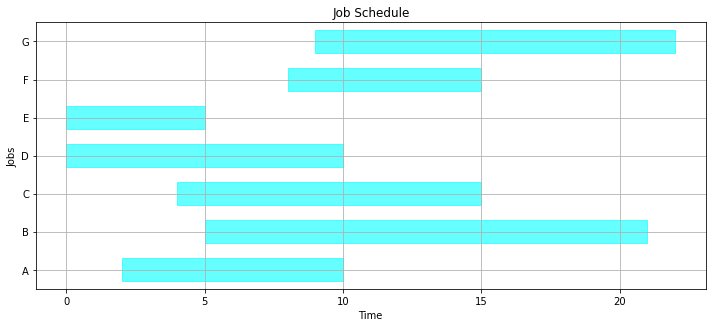

In [55]:
def gantt(JOBS, SCHEDULE={}):
    bw = 0.3
    plt.figure(figsize=(12, 0.7*(len(JOBS.keys()))))
    idx = 0
    for j in sorted(JOBS.keys()):
        x = JOBS[j]['release']
        y = JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='cyan', alpha=0.6)
        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        idx += 1

    plt.ylim(-0.5, idx-0.5)
    plt.title('Job Schedule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
    
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                SCHEDULE[j]['machine'] = 1
        MACHINES = sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))

        plt.figure(figsize=(12, 0.7*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            idx = MACHINES.index(SCHEDULE[j]['machine'])
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Machine Schedule')
        plt.yticks(range(len(MACHINES)), MACHINES)
        plt.ylabel('Machines')
        plt.grid()

gantt(JOBS)

#### 2.3.2 The machine scheduling problem

A schedule consists of a dictionary listing the start and finish times for each job. Once the order of jobs has been determined, the start time can be no earlier than when the job is released for processing, and no earlier than the finish of the previous job.

The following cell presents a function which, given the JOBS data and an order list of jobs indices, computes the start and finish times for all jobs on a single machine. We use this to determine the schedule if the jobs are executed in alphabetical order.

In [56]:
def schedule(JOBS, order=sorted(JOBS.keys())):
    """Schedule a dictionary of JOBS on a single machine in a specified order."""
    start = 0
    finish = 0
    SCHEDULE = {}
    for job in order:
        start = max(JOBS[job]['release'], finish)
        finish = start + JOBS[job]['duration']
        SCHEDULE[job] = {'start': start, 'finish': finish}
    return SCHEDULE   

SCHEDULE = schedule(JOBS)
SCHEDULE

{'A': {'start': 2, 'finish': 7},
 'B': {'start': 7, 'finish': 13},
 'C': {'start': 13, 'finish': 21},
 'D': {'start': 21, 'finish': 25},
 'E': {'start': 25, 'finish': 27},
 'F': {'start': 27, 'finish': 30},
 'G': {'start': 30, 'finish': 32}}

Here we demonstrate a 'partial schedule'.

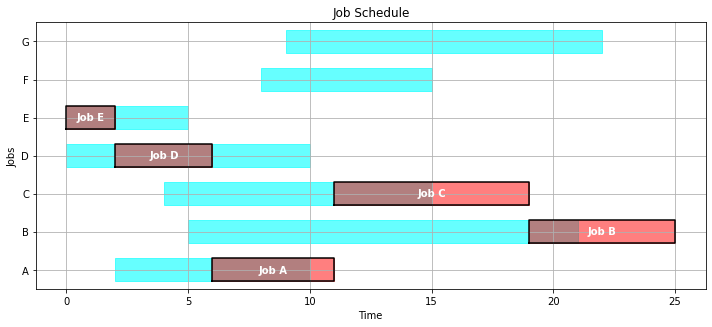

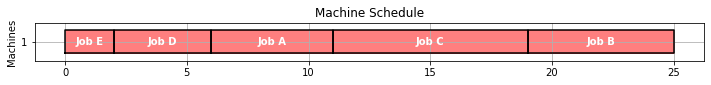

In [57]:
gantt(JOBS, schedule(JOBS, ['E', 'D', 'A', 'C', 'B']))

Here's a schedule where jobs are done in alphabetical order.

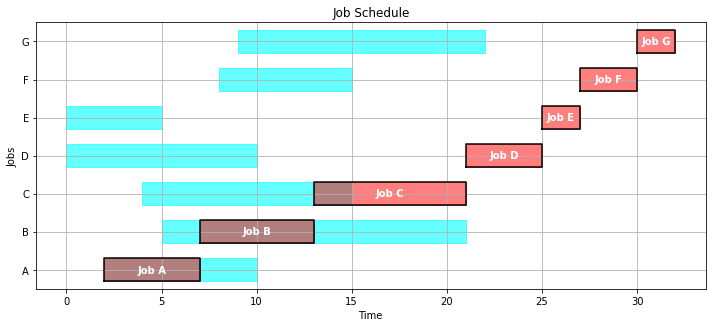

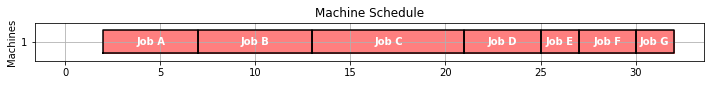

In [58]:
gantt(JOBS, SCHEDULE)

##### 2.3.2.1 Key performance indicators

As presented above, a given schedule may not meet all of the due time requirements. In fact, a schedule meeting all of the requirements might not even be possible. So given a schedule, it is useful to have a function that computes key performance indicators.

In [59]:
def kpi(JOBS, SCHEDULE):
    KPI = {}
    KPI['Makespan'] = max(SCHEDULE[job]['finish'] for job in SCHEDULE)
    KPI['Max Pastdue'] = max(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Sum of Pastdue'] = sum(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Number Pastdue'] = sum(SCHEDULE[job]['finish'] > JOBS[job]['due'] for job in SCHEDULE)
    KPI['Number on Time'] = sum(SCHEDULE[job]['finish'] <= JOBS[job]['due'] for job in SCHEDULE)
    KPI['Fraction on Time'] = KPI['Number on Time']/len(SCHEDULE)
    return KPI

kpi(JOBS, SCHEDULE)

{'Makespan': 32,
 'Max Pastdue': 22,
 'Sum of Pastdue': 68,
 'Number Pastdue': 5,
 'Number on Time': 2,
 'Fraction on Time': 0.2857142857142857}

##### 2.3.2.2 Exercise

Show the Gantt chart and key performance metrics if the jobs are executed in reverse alphabetical order.

{'Makespan': 39,
 'Max Pastdue': 29,
 'Sum of Pastdue': 76,
 'Number Pastdue': 5,
 'Number on Time': 2,
 'Fraction on Time': 0.2857142857142857}

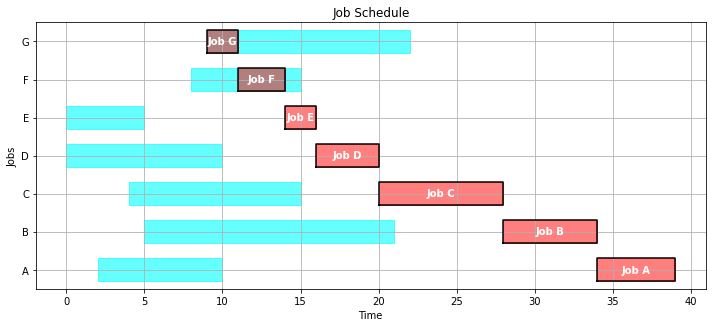

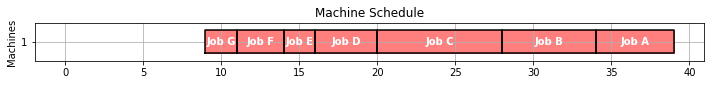

In [60]:
order = sorted(JOBS, reverse=True)
gantt(JOBS, schedule(JOBS,order))
kpi(JOBS, schedule(JOBS,order))

#### 2.3.3 Empirical scheduling

There are a number of commonly encountered empirical rules for scheduling jobs on a single machine. These include:

First-In First-Out (FIFO)
Last-In, First-Out (LIFO)
Shortest Processing Time First (SPT)
Earliest Due Data (EDD)

##### 2.3.3.1 First-in first-out

As an example, we'll first look at 'First-In-First-Out' scheduling which executes job in the order they are released. The following function sorts jobs by release time, then schedules the jobs to execute in that order. A job can only be started no earlier than when it is released.

{'Makespan': 30,
 'Max Pastdue': 13,
 'Sum of Pastdue': 31,
 'Number Pastdue': 6,
 'Number on Time': 1,
 'Fraction on Time': 0.14285714285714285}

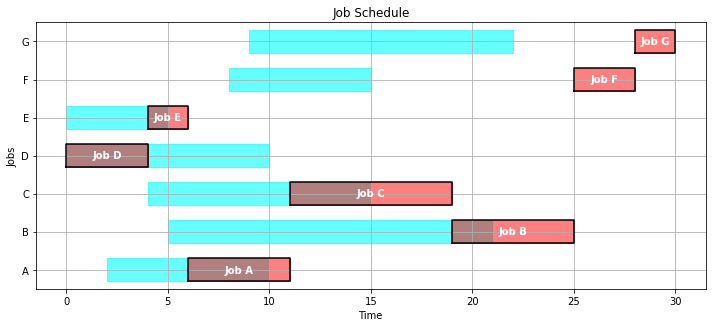

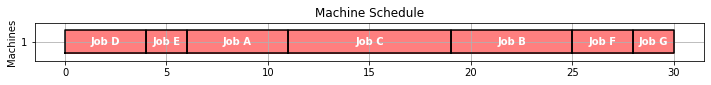

In [61]:
def fifo(JOBS):
    order_by_release = sorted(JOBS, key=lambda job: JOBS[job]['release'])
    return schedule(JOBS, order_by_release)

SCHEDULE = fifo(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

##### 2.3.3.2 Last-in, first-out

{'Makespan': 30,
 'Max Pastdue': 20,
 'Sum of Pastdue': 34,
 'Number Pastdue': 3,
 'Number on Time': 4,
 'Fraction on Time': 0.5714285714285714}

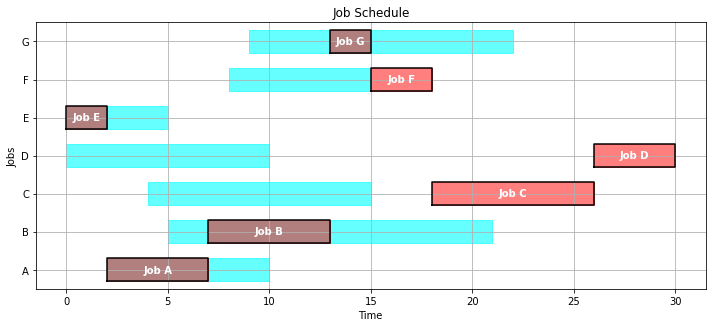

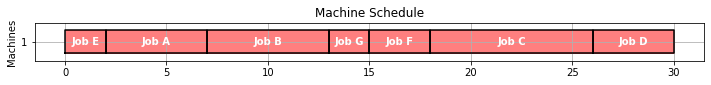

In [62]:
def lifo(JOBS):
    unfinished_jobs = set(JOBS.keys())
    start = 0
    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))
        lifo = {job:JOBS[job]['release'] for job in unfinished_jobs if JOBS[job]['release'] <= start}
        job = max(lifo, key=lifo.get)
        finish = start + JOBS[job]['duration']
        unfinished_jobs.remove(job)
        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}
        start = finish
    return SCHEDULE          
    
gantt(JOBS, lifo(JOBS))
kpi(JOBS, lifo(JOBS))

##### 2.3.3.3 Earliest due date

{'Makespan': 30,
 'Max Pastdue': 8,
 'Sum of Pastdue': 23,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fraction on Time': 0.42857142857142855}

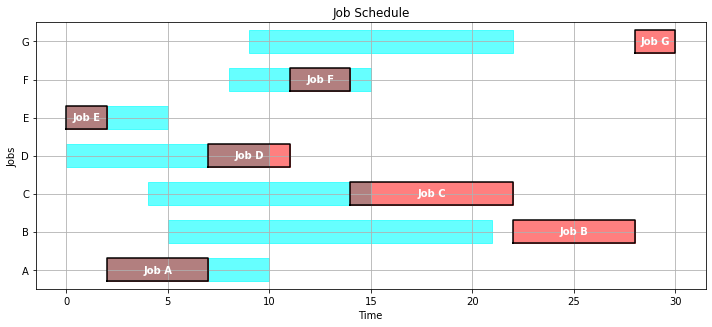

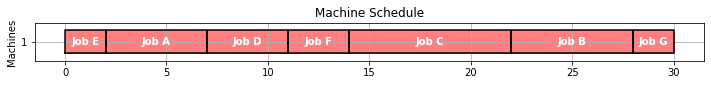

In [63]:
def edd(JOBS):
    unfinished_jobs = set(JOBS.keys())
    start = 0
    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))
        edd = {job:JOBS[job]['due'] for job in unfinished_jobs if JOBS[job]['release'] <= start}
        job = min(edd, key=edd.get)
        finish = start + JOBS[job]['duration']
        unfinished_jobs.remove(job)
        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}
        start = finish
    return SCHEDULE          
    
gantt(JOBS, edd(JOBS))
kpi(JOBS, edd(JOBS))

##### 2.3.3.4 Shortest processing time

{'Makespan': 30,
 'Max Pastdue': 15,
 'Sum of Pastdue': 18,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fraction on Time': 0.42857142857142855}

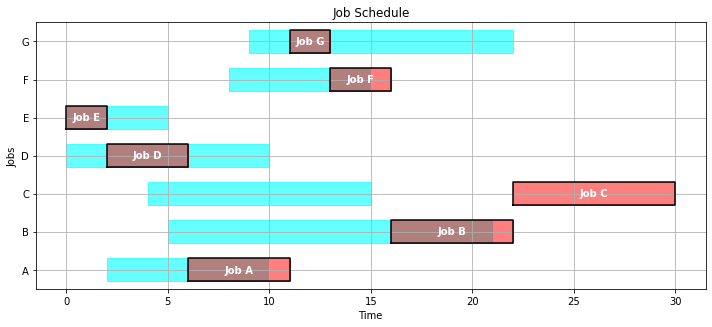

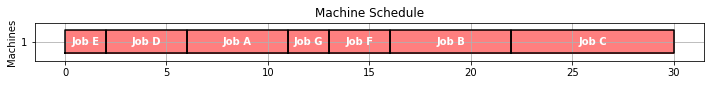

In [64]:
def spt(JOBS):
    unfinished_jobs = set(JOBS.keys())
    start = 0
    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))
        spt = {job:JOBS[job]['duration'] for job in unfinished_jobs if JOBS[job]['release'] <= start}
        job = min(spt, key=spt.get)
        finish = start + JOBS[job]['duration']
        unfinished_jobs.remove(job)
        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}
        start = finish
    return SCHEDULE          
    
gantt(JOBS, spt(JOBS))
kpi(JOBS, spt(JOBS))

#### 2.3.4 Modeling

##### 2.3.4.1 Data

The data for this problem consists of a list of jobs. Each job is tagged with a unique ID along with numerical data giving the time at which the job will be released for machine processing, the expected duration, and the time at which it is due.

| Symbol | Description |
| :- |  :-: |
| $$ID_j$$ | Unique ID for task j | 
| $$due_j$$ | Due time for task j | 
| $$duration_j$$ | Duration of task j | 
| $$release_j$$ | 	Time task j becomes available for processing| 


##### 2.3.4.1 Decision variables

For a single machine, the essential decision variable is the start time at which the job begins processing.

| Symbol | Description |
| :- |  :-: |
| $$start_j$$ | Start of task j | 
| $$makespan_j$$ | Time to complete all jobs.| 
| $$pastdue_j$$ | 	Time by which task j is past dueDuration of task j | 
| $$early_j$$ | 	Time by which task j is finished early| 


A job cannot start until it is released for processing

$$ start_j ≥ release_j$$

Once released for processing, we assume the processing continues until the job is finished. The finish time is compared to the due time, and the result stored in either the early or pastdue decision variables. These decision variables are needed to handle cases where it might not be possible to complete all jobs by the time they are due.

$$start_j + duration_j + early_j = due_j + pastdue_j$$
$$early_j ≥ 0$$
$$pastdue_j ≥ 0$$

Finally, we include a single decision variable measuring the overall makespan for all jobs.

$$start_j + duration_j ≤ makespan$$


he final set of constraints requires that, for any given pair of jobs **j** and **k**, that either **j** starts before **k** finishes, or **k** finishes before **j** starts. The boolean variable **y_{jk}=1** indicates **j** finishes before **k** starts, and is 0 for the opposing case. Note that we only need to consider cases **j>k**

$$start_i + duration_i ≤ start_j + My_{i,j}$$
$$start_j + duration_j ≤ start_i + M(1−y_{i,j})$$


where **M** is a sufficiently large enough to assure the relaxed constraint is satisfied for all plausible values of the decision variables.

#### 2.3.5 Big-M model

We'll take a step-by-step approach to the construction of a "Big-M" model.

##### 2.3.5.1 Step 1. An incomplete bare-bones model

We'll start this model building exercise with just enough variables and constraints to get an answer. This is not a complete model and will therefore give non-physical answers. But it does give a scaffold for further model building.

This first model includes decision variables for the start and finish of each job, a decision variable for makespan, and constraints that define the relationships among these decision variables. The objective function is to minimize makespan.

{'Makespan': 8.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

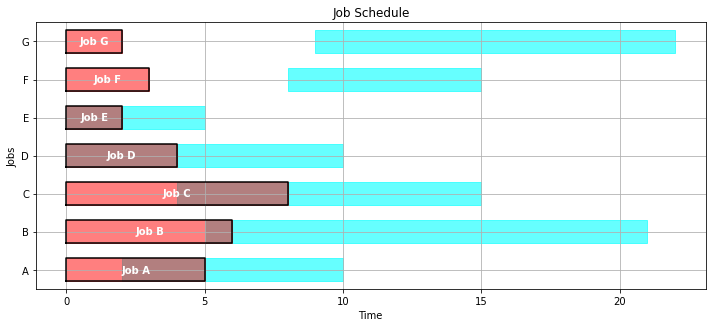

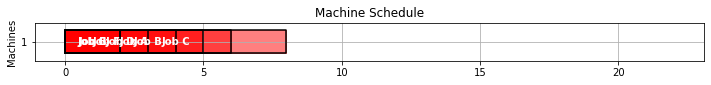

In [65]:
def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.JOBS = Set(initialize=JOBS.keys())

    # decision variables
    m.start = Var(m.JOBS, domain=NonNegativeReals)
    m.finish = Var(m.JOBS, domain=NonNegativeReals)
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals)
    
    # objective function
    m.OBJ = Objective(expr = m.makespan, sense = minimize)
    
    # constraints
    m.c = ConstraintList()
    for j in m.JOBS:
        m.c.add(m.finish[j] == m.start[j] + JOBS[j]['duration'])
        m.c.add(m.finish[j] <= m.makespan)

    SolverFactory('cbc').solve(m)
    
    SCHEDULE = {}
    for j in m.JOBS:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

##### 2.3.5.2 Step 2. Add release time information

Obviously some jobs are being started before they are released for processing. The next version of the model adds that constraint.

{'Makespan': 12.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

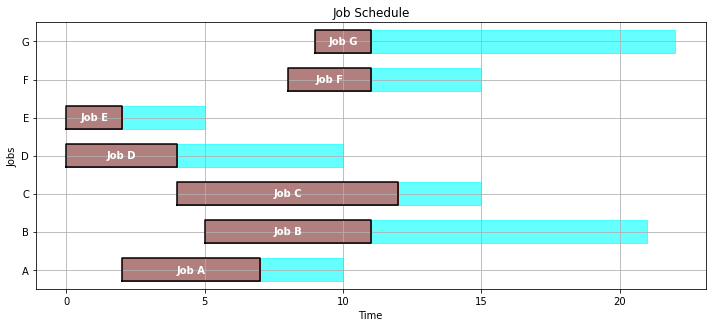

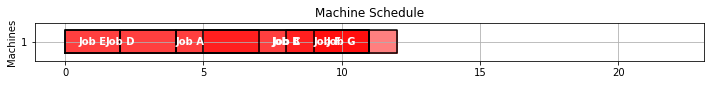

In [66]:
def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.JOBS = Set(initialize=JOBS.keys())

    # decision variables
    m.start = Var(m.JOBS, domain=NonNegativeReals)
    m.finish = Var(m.JOBS, domain=NonNegativeReals)
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals)
    
    # objective function
    m.OBJ = Objective(expr = m.makespan, sense = minimize)
    
    # constraints
    m.c = ConstraintList()
    for j in m.JOBS:
        m.c.add(m.finish[j] == m.start[j] + JOBS[j]['duration'])
        m.c.add(m.finish[j] <= m.makespan)
        m.c.add(m.start[j] >= JOBS[j]['release'])

    SolverFactory('cbc').solve(m)
    
    SCHEDULE = {}
    for j in m.JOBS:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

##### 2.3.5.3 Step 3. Machine conflict constraints

{'Makespan': 30.0,
 'Max Pastdue': 15.0,
 'Sum of Pastdue': 37.0,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fraction on Time': 0.42857142857142855}

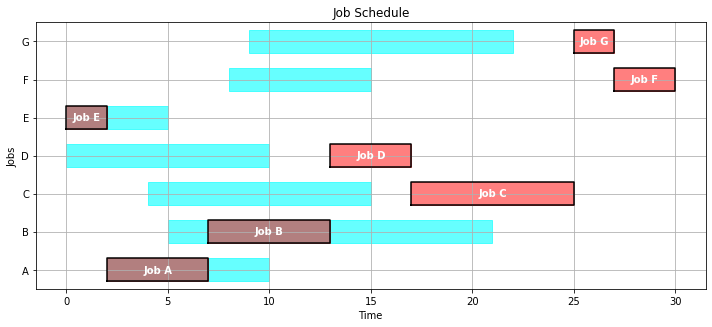

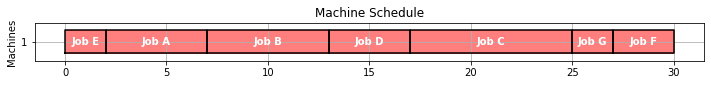

In [67]:
def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.JOBS = Set(initialize=JOBS.keys())
    m.PAIRS = Set(initialize = m.JOBS * m.JOBS, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start = Var(m.JOBS, domain=NonNegativeReals)
    m.finish = Var(m.JOBS, domain=NonNegativeReals)
    m.y = Var(m.PAIRS, domain=Boolean)
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals)
    
    # objective function
    m.OBJ = Objective(expr = m.makespan, sense = minimize)
    
    # constraints
    m.c = ConstraintList()
    for j in m.JOBS:
        m.c.add(m.finish[j] == m.start[j] + JOBS[j]['duration'])
        m.c.add(m.finish[j] <= m.makespan)
        m.c.add(m.start[j] >= JOBS[j]['release'])
    
    M = 100.0
    for j,k in m.PAIRS:
        m.c.add(m.finish[j] <= m.start[k] + M*m.y[j,k])
        m.c.add(m.finish[k] <= m.start[j] + M*(1 - m.y[j,k]))

    SolverFactory('cbc').solve(m)
    
    SCHEDULE = {}
    for j in m.JOBS:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

##### 2.3.5.4 Step 4. Improve the objective function

{'Makespan': 30.0,
 'Max Pastdue': 15.0,
 'Sum of Pastdue': 16.0,
 'Number Pastdue': 2,
 'Number on Time': 5,
 'Fraction on Time': 0.7142857142857143}

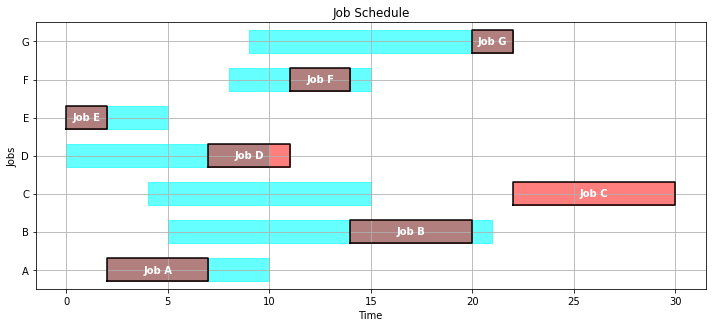

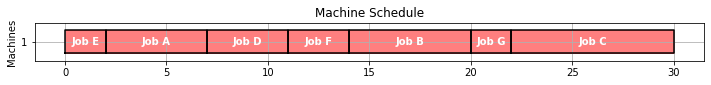

In [68]:
def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.JOBS = Set(initialize=JOBS.keys())
    m.PAIRS = Set(initialize = m.JOBS * m.JOBS, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start = Var(m.JOBS, domain=NonNegativeReals)
    m.finish = Var(m.JOBS, domain=NonNegativeReals)
    m.pastdue = Var(m.JOBS, domain=NonNegativeReals)
    m.y = Var(m.PAIRS, domain=Boolean)
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals)
    
    # objective function
    m.OBJ = Objective(expr = sum(m.pastdue[j] for j in m.JOBS), sense = minimize)
    
    # constraints
    m.c = ConstraintList()
    for j in m.JOBS:
        m.c.add(m.finish[j] == m.start[j] + JOBS[j]['duration'])
        m.c.add(m.finish[j] <= m.makespan)
        m.c.add(m.start[j] >= JOBS[j]['release'])
        m.c.add(m.finish[j] <= JOBS[j]['due'] + m.pastdue[j])
    
    M = 100.0
    for j,k in m.PAIRS:
        m.c.add(m.finish[j] <= m.start[k] + M*m.y[j,k])
        m.c.add(m.finish[k] <= m.start[j] + M*(1 - m.y[j,k]))

    SolverFactory('cbc').solve(m)
    
    SCHEDULE = {}
    for j in m.JOBS:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

#### 2.3.6 Pyomo model

    apt 'gdp.hull' instead.  (deprecated in 5.7) (called from
    /srv/conda/envs/notebook/lib/python3.7/site-
    packages/pyomo/common/factory.py:44)
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 16.0
  Upper bound: 16.0
  Number of objectives: 1
  Number of constraints: 133
  Number of variables: 77
  Number of binary variables: 49
  Number of integer variables: 49
  Number of nonzeros: 7
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.49
  Wallclock time: 0.6
  Termination condition: optimal
  T

{'Makespan': 30.0,
 'Max Pastdue': 15.0,
 'Sum of Pastdue': 16.0,
 'Number Pastdue': 2,
 'Number on Time': 5,
 'Fraction on Time': 0.7142857142857143}

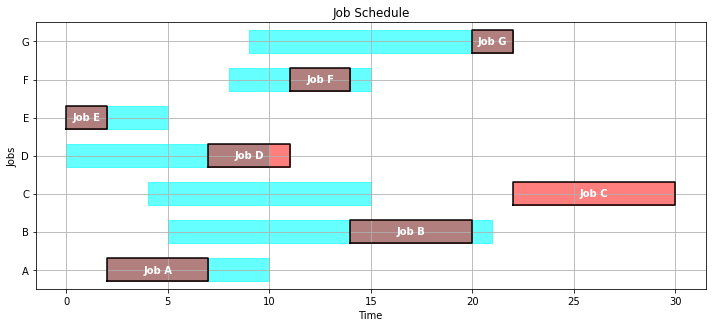

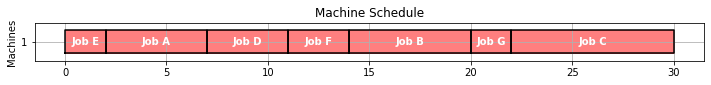

In [69]:
from pyomo.gdp import *

def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # upper bounds on how long it would take to process all jobs
    tmax = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    # decision variables
    m.start      = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.pastdue    = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.early      = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.maxpastdue = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.ispastdue  = Var(m.J, domain=Binary)

    # objective function
    m.OBJ = Objective(expr = sum([m.pastdue[j] for j in m.J]), sense = minimize)

    # constraints
    m.c1 = Constraint(m.J, rule=lambda m, j: m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Disjunction(m.PAIRS, rule=lambda m, j, k:
        [m.start[j] + JOBS[j]['duration'] <= m.start[k], 
         m.start[k] + JOBS[k]['duration'] <= m.start[j]])    
    
    m.c4 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= m.maxpastdue)
    m.c5 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.c6 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= tmax*m.ispastdue[j])
    
    TransformationFactory('gdp.chull').apply_to(m)
    SolverFactory('cbc').solve(m).write()
    
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

#### 2.3.7 Multiple machines

The case of multiple machines requires a modest extension of model described above. Given a set M of machines, we introduce an additional decision binary variable $z_{j,m}$ indicating if job j has been assigned to machine m. The additional constraints
$$∑_{m∈M} z_{j,m}=1 ∀ j$$
require each job to be assigned to exactly one machine for processing. 

If both jobs j and k have been assigned to machine m, then the disjunctive ordering constraints must apply. This logic is equivalent to the following constraints for j<k.

$$start_j + duration_j ≤ start_k + M y_{j,k}+M(1−z_{j,m})+M(1−z_{k,m})$$
$$start_k + duration_k ≤ start_j + M (1−y_{j,k}) + M(1−z_{j,m})+M(1−z_{k,m})$$


In [70]:
MACHINES = ['A','B']
[mach for mach in MACHINES]

['A', 'B']

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -15.0
  Upper bound: -15.0
  Number of objectives: 1
  Number of constraints: 98
  Number of variables: 50
  Number of binary variables: 42
  Number of integer variables: 42
  Number of nonzeros: 15
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.7
  Wallclock time: 0.81
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound:

{'Makespan': 15.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

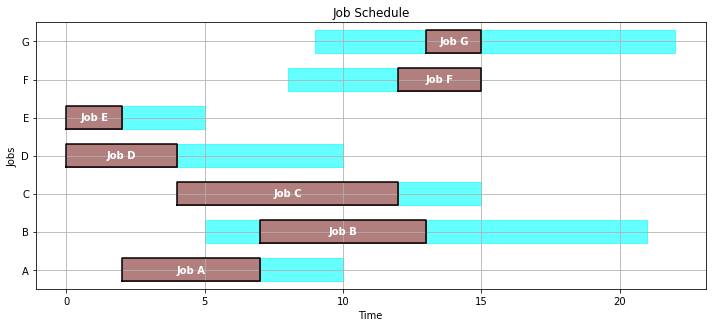

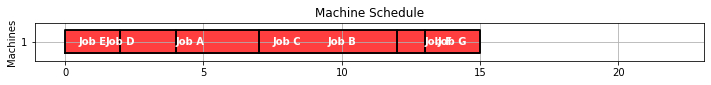

In [71]:
MACHINES = ['A','B']

def schedule_machines(JOBS, MACHINES):
    
    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.M = Set(initialize=MACHINES)
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start      = Var(m.J, bounds=(0, 1000))
    m.makespan   = Var(domain=NonNegativeReals)
    m.pastdue    = Var(m.J, domain=NonNegativeReals)
    m.early      = Var(m.J, domain=NonNegativeReals)
    
    # additional decision variables for use in the objecive
    m.ispastdue  = Var(m.J, domain=Binary)
    m.maxpastdue = Var(domain=NonNegativeReals)
    
    # for binary assignment of jobs to machines
    m.z = Var(m.J, m.M, domain=Binary)

    # for modeling disjunctive constraints
    m.y = Var(m.PAIRS, domain=Binary)
    BigM = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    m.OBJ = Objective(expr = sum(m.pastdue[j] for j in m.J) + m.makespan - sum(m.early[j] for j in m.J), sense = minimize)

    m.c1 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j:
            m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Constraint(m.J, rule=lambda m, j: 
            sum(m.z[j,mach] for mach in m.M) == 1)
    m.c4 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= BigM*m.ispastdue[j])
    m.c5 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= m.maxpastdue)
    m.c6 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.d1 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k:
            m.start[j] + JOBS[j]['duration'] <= m.start[k] + BigM*(m.y[j,k] + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    m.d2 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k: 
            m.start[k] + JOBS[k]['duration'] <= m.start[j] + BigM*((1-m.y[j,k]) + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    
    SolverFactory('cbc').solve(m).write()
    print("---------------" , m.z)
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {
            'start': m.start[j](), 
            'finish': m.start[j]() + JOBS[j]['duration']#,
            #'machine': [[m.z[j,mach]][0] for mach in MACHINES if j == mach]
            #'machine': [mach for mach in MACHINES if m.z[j,mach][0]]
        }
        
    return SCHEDULE


SCHEDULE = schedule_machines(JOBS,MACHINES)
print(SCHEDULE)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

#### 2.3.8 Disjunctive Version

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -15.0
  Upper bound: -15.0
  Number of objectives: 1
  Number of constraints: 637
  Number of variables: 435
  Number of binary variables: 133
  Number of integer variables: 133
  Number of nonzeros: 15
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 1.28
  Wallclock time: 1.41
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and b

{'Makespan': 15.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

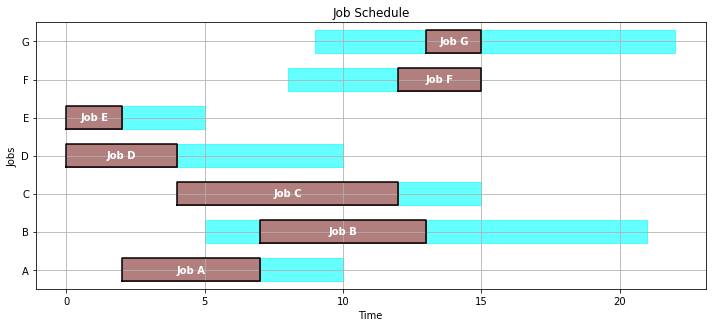

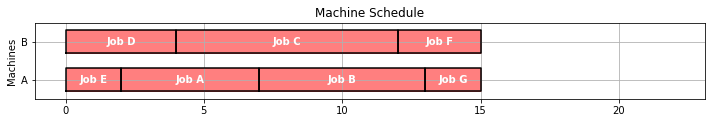

In [72]:
MACHINES = ['A','B']

def schedule_machines(JOBS, MACHINES):
    
    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.M = Set(initialize=MACHINES)
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start      = Var(m.J, bounds=(0, 1000))
    m.makespan   = Var(domain=NonNegativeReals)
    m.pastdue    = Var(m.J, bounds=(0, 1000))
    m.early      = Var(m.J, bounds=(0, 10000))
    
    # additional decision variables for use in the objecive
    m.ispastdue  = Var(m.J, domain=Binary)
    m.maxpastdue = Var(domain=NonNegativeReals)
    
    # for binary assignment of jobs to machines
    m.z = Var(m.J, m.M, domain=Binary)

    # for modeling disjunctive constraints
    BigM = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    m.OBJ = Objective(expr = sum(m.pastdue[j] for j in m.J) + m.makespan - sum(m.early[j] for j in m.J), sense = minimize)

    # job starts after it is released
    m.c1 = Constraint(m.J, rule=lambda m, j: m.start[j] >= JOBS[j]['release'])

    # defines early and pastdue
    m.c2 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.d1 = Disjunction(m.J, rule=lambda m, j: [m.early[j]==0, m.pastdue[j]==0])

    # each job is assigned to one and only one machine
    m.c3 = Constraint(m.J, rule=lambda m, j: sum(m.z[j, mach] for mach in m.M) == 1)

    # defines a binary variable indicating if a job is past due
    m.c4 = Disjunction(m.J, rule=lambda m, j: [m.pastdue[j] == 0, m.ispastdue[j] == 1])

    # all jobs must be finished before max pastdue
    m.c5 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= m.maxpastdue)

    # defining make span
    m.c6 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] <= m.makespan)
 
    # disjuctions
    m.d0 = Disjunction(m.M, m.PAIRS, rule = lambda m, mach, j, k: 
                       [m.start[j] + JOBS[j]['duration'] <= m.start[k] + BigM*((1-m.z[j, mach]) + (1-m.z[k, mach])),
                        m.start[k] + JOBS[k]['duration'] <= m.start[j] + BigM*((1-m.z[j, mach]) + (1-m.z[k, mach]))])
  
    transform = TransformationFactory('gdp.hull')
    transform.apply_to(m)

    SolverFactory('cbc').solve(m).write()
    
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {
            'start': m.start[j](), 
            'finish': m.start[j]() + JOBS[j]['duration'],
            'machine': [mach for mach in MACHINES if m.z[j,mach]][0]
        }
        
    return SCHEDULE
        
SCHEDULE = schedule_machines(JOBS,MACHINES)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

### 2.4 Soft Landing Apollo 11 on the Moon

In [73]:
# Imports
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
    else:
        try:
            !conda install -c conda-forge ipopt -y
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))
from pyomo.environ import *
from pyomo.dae import *

In [74]:
# Data for the lunar Module
# lunar module
m_ascent_dry = 2445.0          # kg mass of ascent stage without fuel
m_ascent_fuel = 2376.0         # kg mass of ascent stage fuel
m_descent_dry = 2034.0         # kg mass of descent stage without fuel
m_descent_fuel = 8248.0        # kg mass of descent stage fuel

m_fuel = m_descent_fuel
m_dry = m_ascent_dry + m_ascent_fuel + m_descent_dry
m_total = m_dry + m_fuel

# descent engine characteristics
v_exhaust = 3050.0             # m/s
u_max = 45050.0/v_exhaust      # 45050 newtons / exhaust velocity

# landing mission specifications
h_initial = 100000.0           # meters
v_initial = 1520               # orbital velocity m/s
g = 1.62                       # m/s**2

#### **2.4.1 First attempt at a solution**

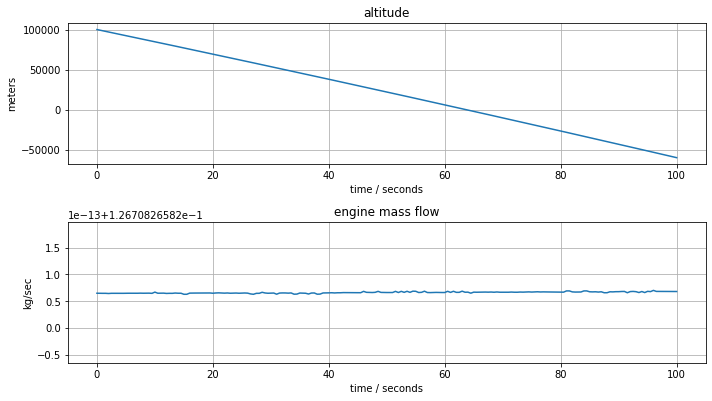

In [75]:
# Having an arbitrary value for the length of the landing mission
t_f = 100

m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, t_f))
m.h = Var(m.t)
m.u = Var(m.t, domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.ode1 = Constraint(m.t, rule = lambda m, t: m_total*m.a[t] == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

def solve(m):
  
    TransformationFactory('dae.finite_difference').apply_to(m, nfe=200, scheme='FORWARD')
    SolverFactory('ipopt').solve(m)
    
    tsim = [t for t in m.t]
    hsim = [m.h[t]() for t in m.t]
    usim = [m.u[t]() for t in m.t]

    plt.figure(figsize=(10, 8))
    plt.subplot(3,1,1)
    plt.plot(tsim, hsim)
    plt.title('altitude')
    plt.xlabel('time / seconds')
    plt.ylabel('meters')
    plt.grid(True)

    plt.subplot(3,1,2)
    plt.plot(tsim, usim)
    plt.title('engine mass flow')
    plt.xlabel('time / seconds')
    plt.ylabel('kg/sec')
    plt.grid(True)

    plt.tight_layout()

solve(m)

The solver reported a solution where the engine doesn't fire, and the lunar module crashes into the lunar surface at full speed about 66 seconds after the start of the descent mission.
The outcome of the mission needs to be specified; Let's start by specifying the final condition as being on the surface

<center>$h\left(t_{f}\right)=0$</center>

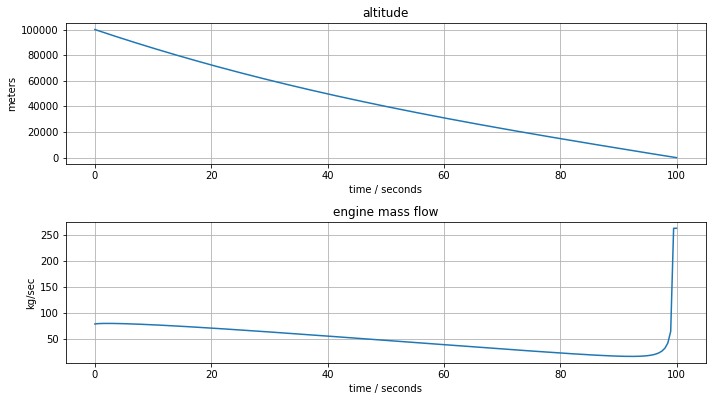

In [76]:
# Fixing the terminal value of h
t_f = 100

m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, t_f))
m.h = Var(m.t)
m.u = Var(m.t, domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.ode1 = Constraint(m.t, rule = lambda m, t: m_total*m.a[t] == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[t_f].fix(0)    # land on surface

solve(m)

The descent mission now finishes the descent at the lunar surface, but unfortunately arrives with sufficient velocity to still be considered a crash.

#### **2.4.2 Making it a soft landing**
In order to make it a soft landing, we also need to specify the terminal velocity:

<center>$h\left(t_{f}\right)=0$

$v\left(t_{f}\right)=0$</center>

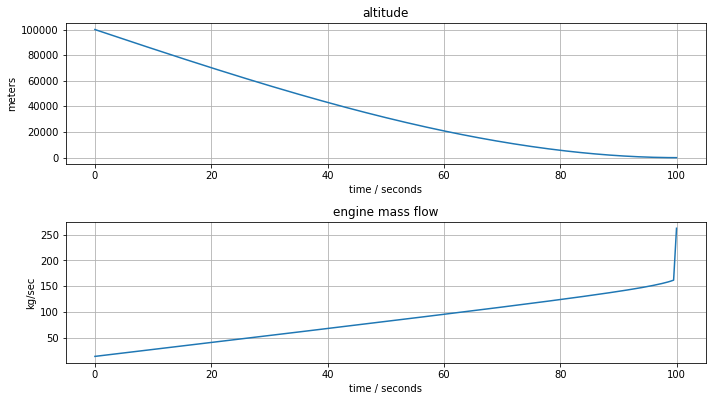

In [77]:
# Fixing terminal values of the associated Pyomo values
t_f = 100

m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, t_f))
m.h = Var(m.t)
m.u = Var(m.t, domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.ode1 = Constraint(m.t, rule = lambda m, t: m_total*m.a[t] == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[t_f].fix(0)    # land on surface
m.v[t_f].fix(0)    # soft landing

solve(m)

The lunar module now is now successfully landing on the lunar surface, but the fuel flow requirement exceeds the maximum capacity of the descent engine.

#### **2.4.3 Restrict fuel flow to engine capacity**
The next step is establish constraints on the control action by limiting fuel flow to the mass flow limits of the descent engine.
<center>$0 \leq u(t) \leq u_{\max }$</center>

Since less thrust is available, we may need to extend the length of the landing mission to find a feasible solution to the optimization problem

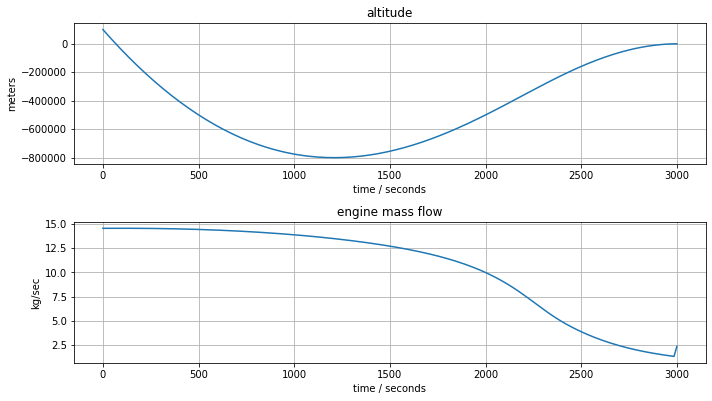

In [78]:
t_f = 3000

m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, t_f))
m.h = Var(m.t)
m.u = Var(m.t, bounds=(0, u_max))

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.ode1 = Constraint(m.t, rule = lambda m, t: m_total*m.a[t] == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[t_f].fix(0)    # land on surface
m.v[t_f].fix(0)    # soft landing

solve(m)

#### **2.4.4 Version 2: Rescaled model**

At this point, it's now clear the first version of this model has run into some serious problems:

- The calculated trajectory takes us through a crash landing and trip through the interior of the moon.
- The engine thrust never goes to zero, even when the lander is at zero velocity and on the surface. The reason is that the model doesn't account for the reaction force of the surface on the lander. So the lander is really just hoovering rather than landing.
- There is no obvious means of estimating the time required for the mission.
Let's begin with the last issue. We will introduce an additional decision variable T denoting the length of the mission. Time is then rescaled as

<center>$\tau=\frac{t}{T} \quad \Longrightarrow \quad t=\tau T$</center>

The differential equation model then becomes

<center>$\frac{m}{T^{2}} \frac{d^{2} h}{d \tau^{2}}=-m g+v_{e} u$</center>

The net result is that an additional variable, T, denoting the duration of the descent mission has been introduced into the optimization problem.

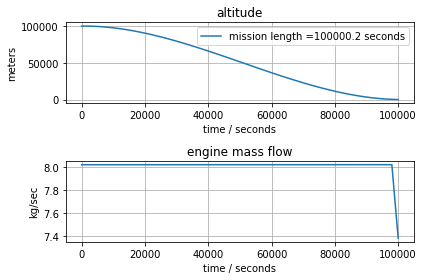

In [79]:
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, 1))
m.h = Var(m.t)
m.u = Var(m.t, bounds=(0, u_max))
m.T = Var(domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.ode1 = Constraint(m.t, rule = lambda m, t: 
    m_total*m.a[t]/m.T**2 == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[1].fix(0)    # land on surface
m.v[1].fix(0)    # soft landing

def solve(m):
  
    TransformationFactory('dae.finite_difference').apply_to(m, nfe=50, scheme='FORWARD')
    SolverFactory('ipopt').solve(m)
    
    tsim = [t*m.T() for t in m.t]
    hsim = [m.h[t]() for t in m.t]
    usim = [m.u[t]() for t in m.t]

    plt.subplot(2,1,1)
    plt.plot(tsim, hsim)
    plt.title('altitude')
    plt.xlabel('time / seconds')
    plt.ylabel('meters')
    plt.legend(['mission length =' + str(round(m.T(),1)) + ' seconds'])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tsim, usim)
    plt.title('engine mass flow')
    plt.xlabel('time / seconds')
    plt.ylabel('kg/sec')
    plt.grid(True)
    
    plt.tight_layout()

solve(m)

#### **2.4.5 How much fuel is burned?**
Fuel consumption can be calculated as

<center>fuel consumed $=\int_{0}^{T} u(t) d t=T \int_{0}^{1} u(\tau) d \tau$</center>

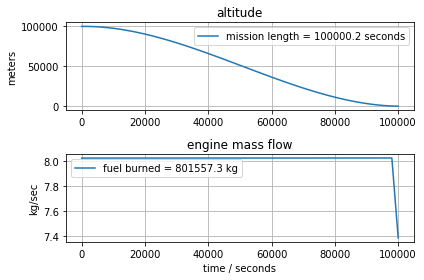

In [80]:
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, 1))
m.h = Var(m.t)
m.u = Var(m.t, bounds=(0, u_max))
m.T = Var(domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.fuel = Integral(m.t, wrt=m.t, rule = lambda m, t: m.u[t]*m.T)

m.ode1 = Constraint(m.t, rule = lambda m, t: 
    m_total*m.a[t]/m.T**2 == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[1].fix(0)    # land on surface
m.v[1].fix(0)    # soft landing

def solve(m):
    TransformationFactory('dae.finite_difference').apply_to(m, nfe=50, scheme='FORWARD')
    SolverFactory('ipopt').solve(m)
    
    tsim = [t*m.T() for t in m.t]
    hsim = [m.h[t]() for t in m.t]
    usim = [m.u[t]() for t in m.t]

    plt.subplot(2,1,1)
    plt.plot(tsim, hsim)
    plt.title('altitude')
    plt.ylabel('meters')
    plt.legend(['mission length = ' + str(round(m.T(),1)) + ' seconds'])
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.plot(tsim, usim)
    plt.title('engine mass flow')
    plt.xlabel('time / seconds')
    plt.ylabel('kg/sec')
    plt.legend(['fuel burned = ' + str(round(m.fuel(),1)) + ' kg'])
    plt.grid(True)

    plt.tight_layout()

solve(m)

#### **2.4.6 Minimize fuel consumption**
<center>$\min _{u(\tau), T} T \int_{0}^{1} u(\tau) d \tau$</center>

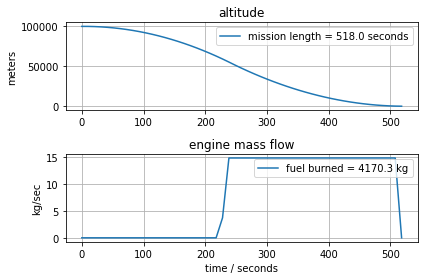

In [81]:
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, 1))
m.h = Var(m.t)
m.u = Var(m.t, bounds=(0, u_max))
m.T = Var(domain=NonNegativeReals)

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)

m.fuel = Integral(m.t, wrt=m.t, rule = lambda m, t: m.u[t]*m.T)
m.obj = Objective(expr=m.fuel, sense=minimize)

m.ode1 = Constraint(m.t, rule = lambda m, t: m_total*m.a[t]/m.T**2 == -m_total*g + v_exhaust*m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)

m.h[1].fix(0)    # land on surface
m.v[1].fix(0)    # soft landing

solve(m)

#### **2.4.7 Version 3: Rocket Model**
The first version of the rocket model has run into a serious problem because it appears not to provide enough mass flow to the engine to prevent a crash landing. But that may be an artifact of the assumption of constant mass. For Apollo 11 Lunar Module, for example, the fuel in the descent engine comprises more than 50% of the total mass of the lander.

For the second version of the rocket model, we augment the model with a mass balance for fuel. This yields

<center> $\begin{aligned} \frac{m(t)}{T^{2}} \frac{d^{2} h}{d \tau^{2}} &=-m(t) g+v_{e} u \\ \frac{1}{T} \frac{d m}{d \tau} &=-u \end{aligned}$</center>

At this point we need to worry about nonsensical answers to the optimization for minimum fuel. For this purpose we add upper and lower bounds on T that should restrict the solver to meaningful solutions.

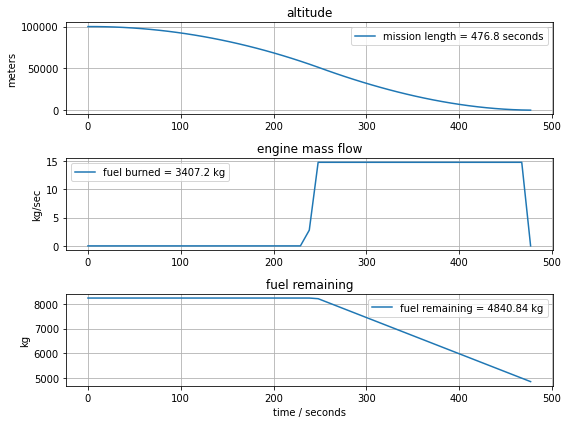

In [82]:
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, 1))
m.h = Var(m.t, domain=NonNegativeReals)
m.m = Var(m.t)
m.u = Var(m.t, bounds=(0, u_max))
m.T = Var(bounds=(50,3000))

m.v = DerivativeVar(m.h, wrt=m.t)
m.a = DerivativeVar(m.v, wrt=m.t)
m.mdot = DerivativeVar(m.m, wrt=m.t)

m.fuel = Integral(m.t, wrt=m.t, rule = lambda m, t: m.u[t]*m.T)
m.obj = Objective(expr=m.fuel, sense=minimize)

m.ode1 = Constraint(m.t, rule = lambda m, t: m.m[t]*m.a[t]/m.T**2 == -m.m[t]*g + v_exhaust*m.u[t])
m.ode2 = Constraint(m.t, rule = lambda m, t: m.mdot[t]/m.T == -m.u[t])

m.h[0].fix(h_initial)
m.v[0].fix(-v_initial)
m.m[0].fix(m_total)

m.h[1].fix(0)    # land on surface
m.v[1].fix(0)    # soft landing

def solve(m):
    TransformationFactory('dae.finite_difference').apply_to(m, nfe=50, scheme='FORWARD')
    SolverFactory('ipopt').solve(m)
    
    m_nonfuel = m_ascent_dry + m_ascent_fuel + m_descent_dry
    
    tsim = [t*m.T() for t in m.t]
    hsim = [m.h[t]() for t in m.t]
    usim = [m.u[t]() for t in m.t]
    fsim = [m.m[t]() - m_nonfuel for t in m.t]

    plt.figure(figsize=(8,6))
    plt.subplot(3,1,1)
    plt.plot(tsim, hsim)
    plt.title('altitude')
    plt.ylabel('meters')
    plt.legend(['mission length = ' + str(round(m.T(),1)) + ' seconds'])
    plt.grid(True)

    plt.subplot(3,1,2)
    plt.plot(tsim, usim)
    plt.title('engine mass flow')
    plt.ylabel('kg/sec')
    plt.legend(['fuel burned = ' + str(round(m.fuel(),1)) + ' kg'])
    plt.grid(True)

    plt.subplot(3,1,3)
    plt.plot(tsim, fsim)
    plt.title('fuel remaining')
    plt.xlabel('time / seconds')
    plt.ylabel('kg')
    plt.legend(['fuel remaining = ' + str(round(fsim[-1],2)) + ' kg'])
    plt.grid(True)

    plt.tight_layout()

solve(m)